In [2]:
library(Seurat)
library(ggplot2)
library(ggthemes)

Warning message:
“package ‘Seurat’ was built under R version 4.0.5”
Attaching SeuratObject

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”


In [1]:
sc = readRDS("data/sc.annotate_celltype.rds")

In [3]:
sc

An object of class Seurat 
30397 features across 82704 samples within 2 assays 
Active assay: RNA (27397 features, 0 variable features)
 1 other assay present: integrated
 3 dimensional reductions calculated: pca, umap, tsne

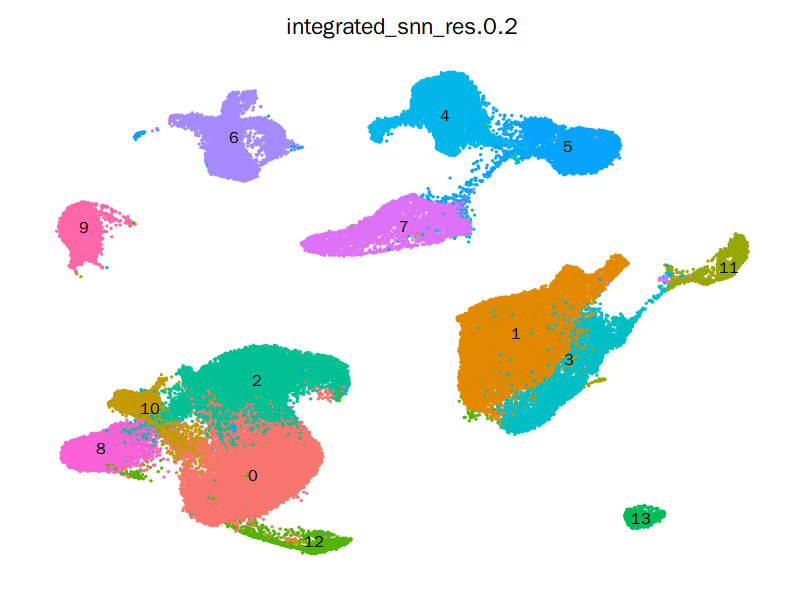

In [4]:
options(repr.plot.height =6, repr.plot.width = 8, repr.plot.res=100)
DimPlot(sc, group.by="integrated_snn_res.0.2", label = T) + NoAxes() + NoLegend()

In [5]:
marker_genes = c("CD2","CD3D", "CD3E", "FOXP3", "CTLA4", "PDCD1",
                "NKG7", "KLRD1","GNLY",
                "LYZ", "C1QC",
                "CD79A", "MS4A1", "MZB1", "IGHG1", # B 
                "KRT6A", "KRT17", "SFN", # epithelial cell
                "SLPI", "WFDC2",   # Endocervix epithelial cell
                "RAMP2", "A2M",    # Endothelial cell
                "TPSB2", "TPSAB1", # mast cell
                "ACTA2", "RGS5",   # myocyte
                "DCN", "LUM", # Fibroblast cell
                "MUC1", "LCN2", "COL17A1", "KRT14", "KRT15", "IGFBP5"
               )


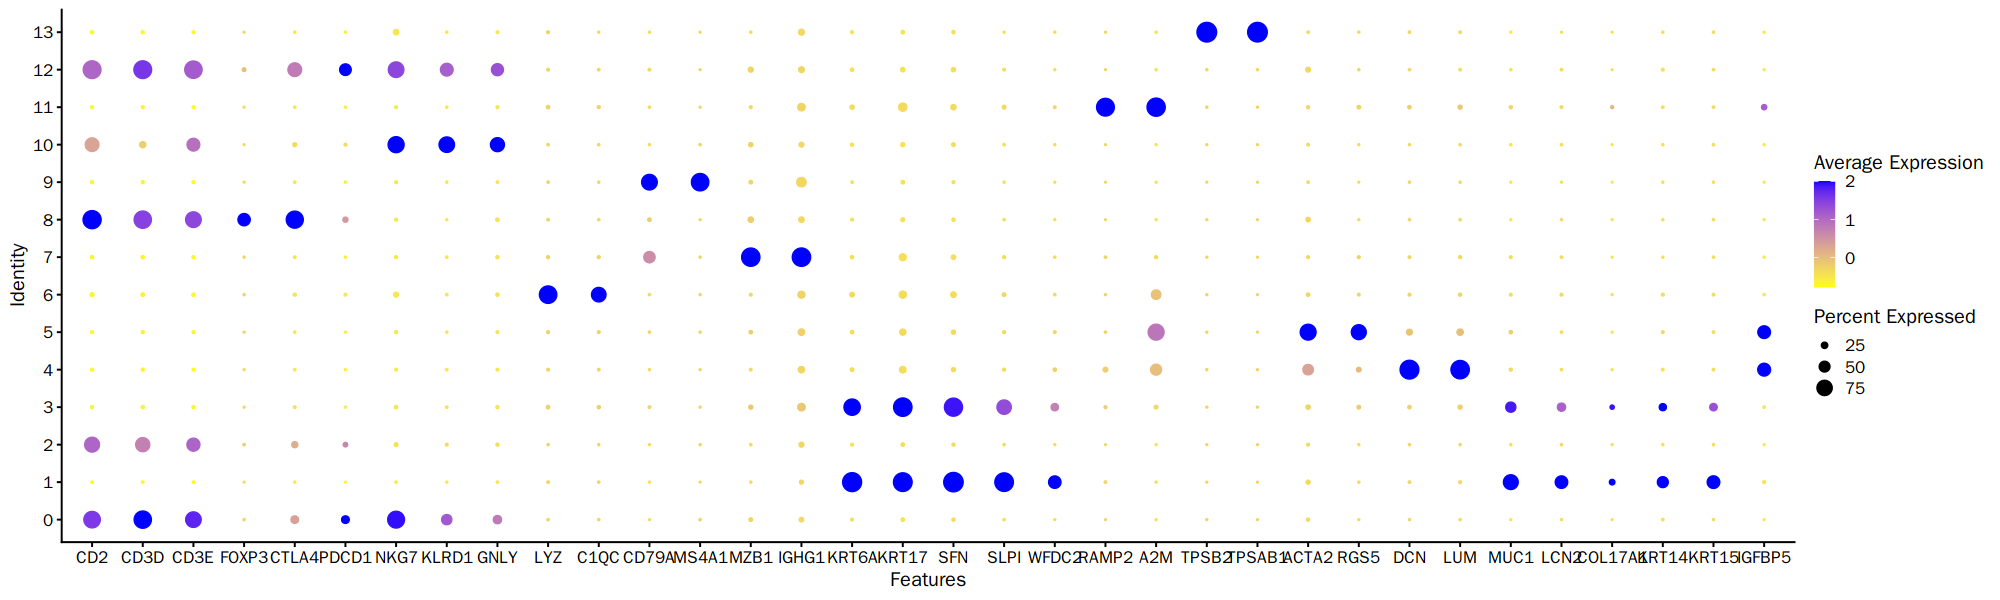

In [6]:
options(repr.plot.height =6, repr.plot.width = 20, repr.plot.res=100)
DotPlot(sc, features=marker_genes, cols=c("yellow", "blue"),  col.min=-1, col.max=2, cluster.idents =F)

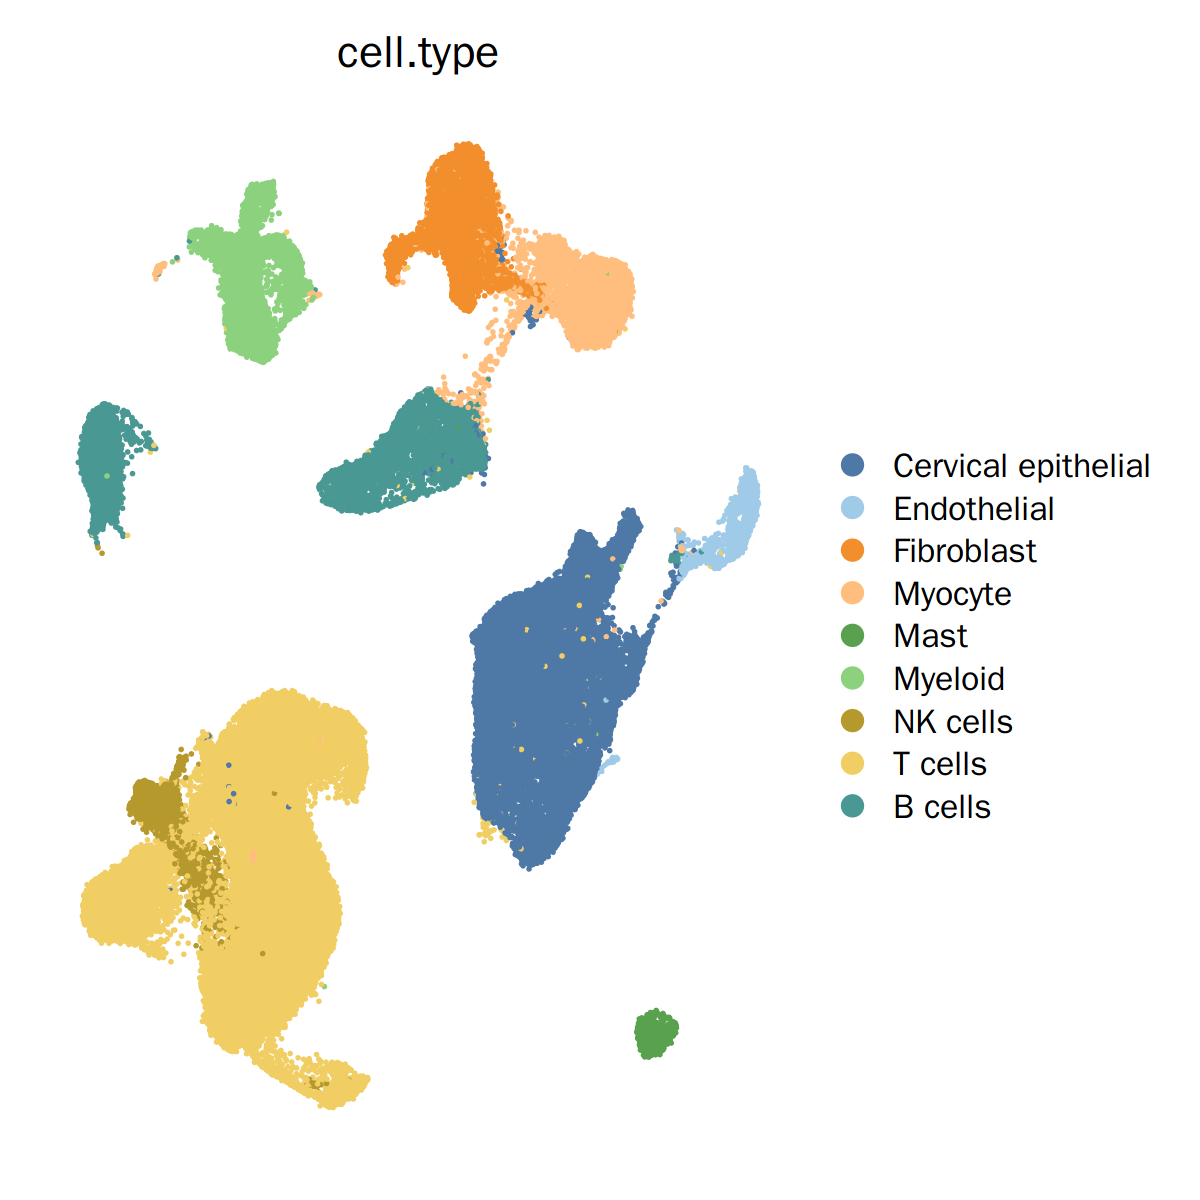

In [7]:
options(repr.plot.height =6, repr.plot.width = 6, repr.plot.res=200)

DimPlot(sc, group.by="cell.type",  label = F, pt.size=0.01, raster=F) + NoAxes()   + scale_colour_tableau("Tableau 20") 

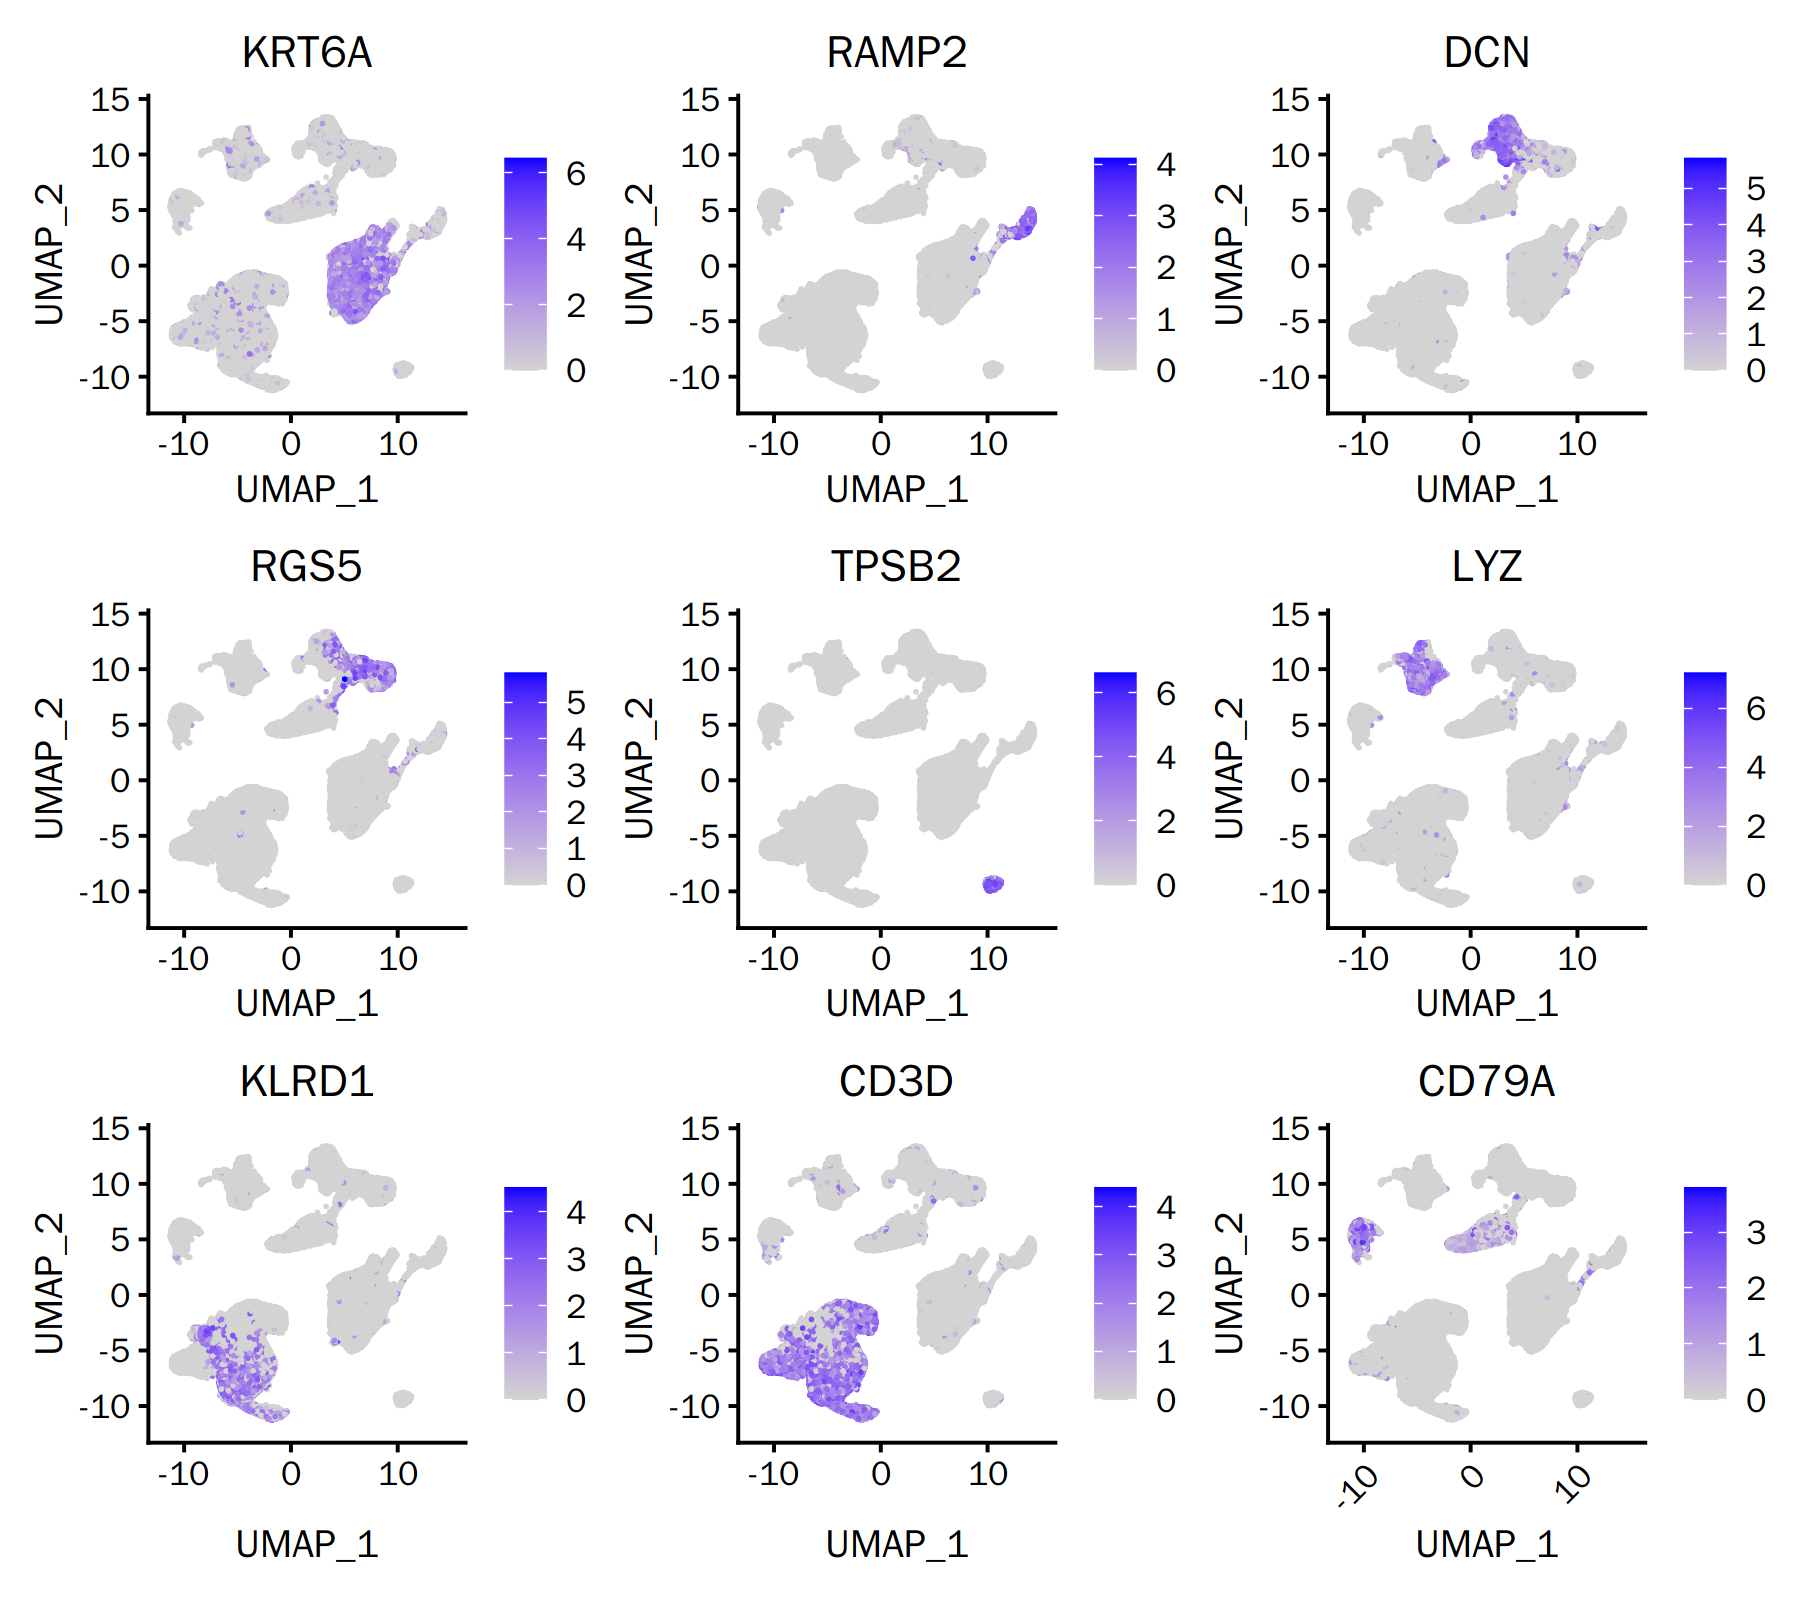

In [17]:
show_marker_genes = c("KRT6A", "RAMP2", "DCN",  "RGS5", "TPSB2", "LYZ","KLRD1","CD3D", "CD79A")
options(repr.plot.height =8, repr.plot.width = 9, repr.plot.res=200)
FeaturePlot(sc,  features=show_marker_genes) + theme(axis.text.x = element_text(angle=45, hjust=1))

In [ ]:
show_marker_genes = c("KRT6A", "KRT17","RAMP2", "A2M","DCN", "LUM","ACTA2", "RGS5", "TPSB2", "TPSAB1","LYZ", "C1QC","NKG7", "KLRD1","CD3D", "CD79A", "MS4A1")
options(repr.plot.height =3.5, repr.plot.width = 9, repr.plot.res=200)
DotPlot(sc, group.by="cell.type", features=show_marker_genes, cols="RdYlBu",  ) + theme(axis.text.x = element_text(angle=45, hjust=1))

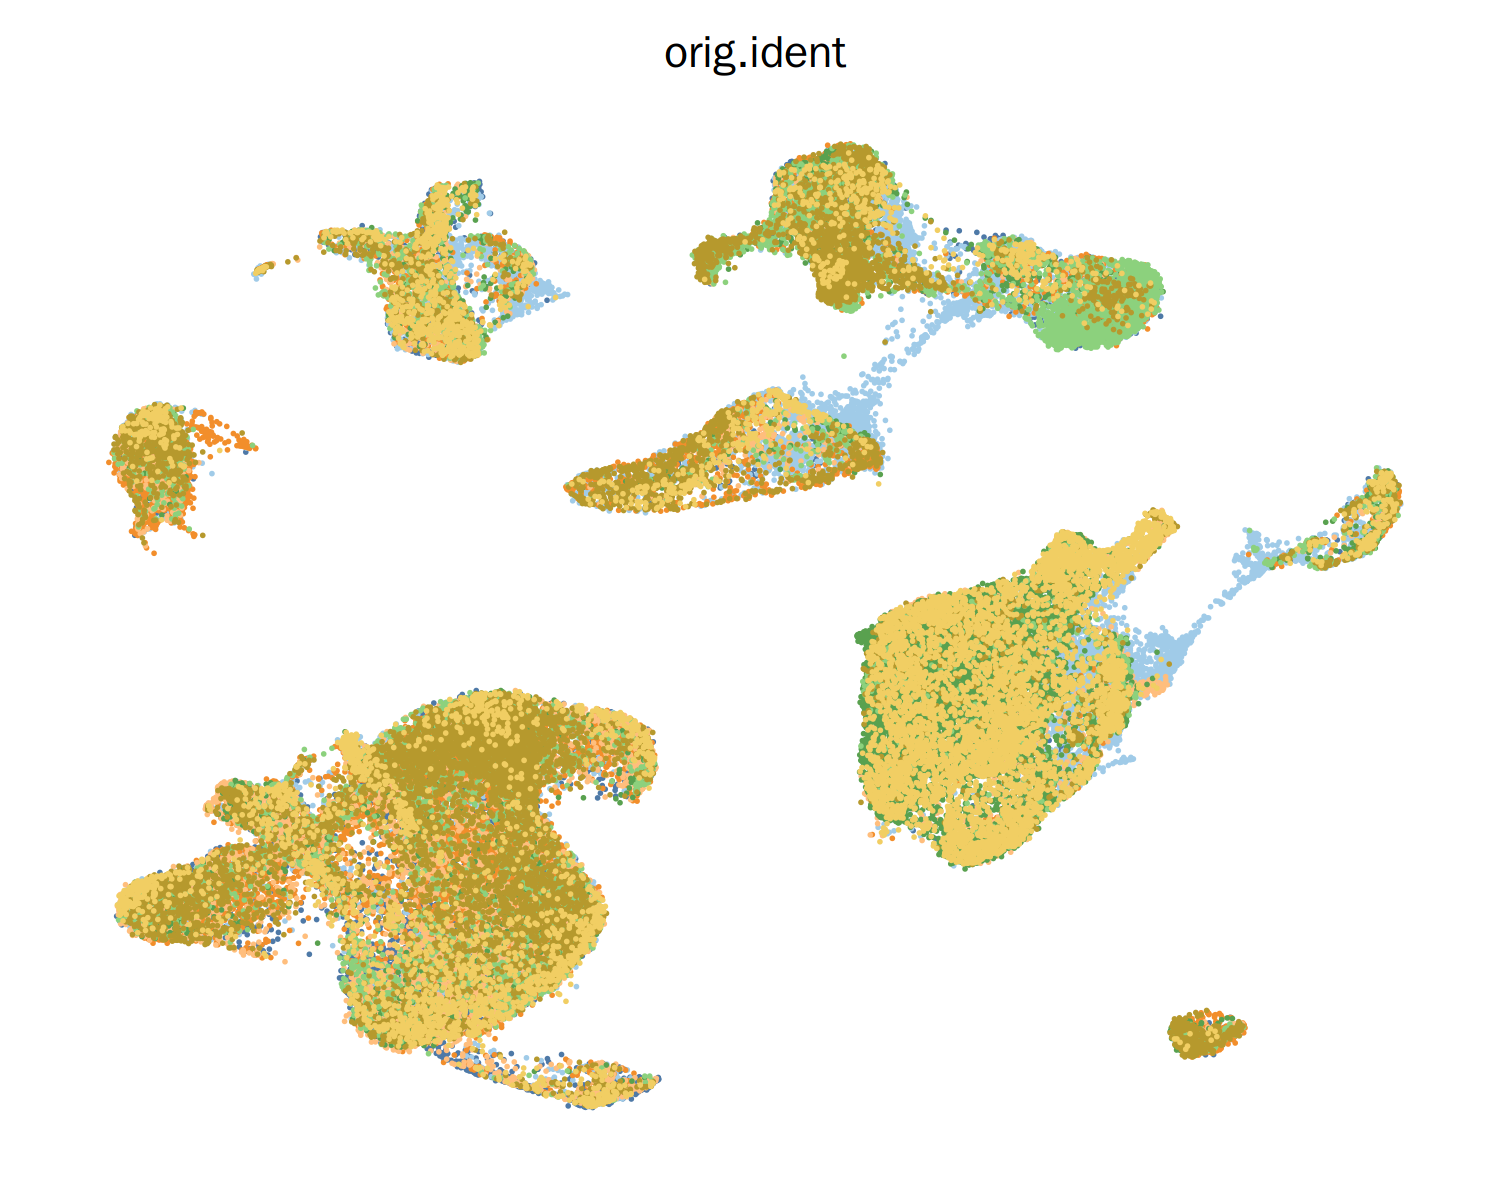

In [8]:
options(repr.plot.height =6, repr.plot.width = 7.5, repr.plot.res=200)
DimPlot(sc, group.by="orig.ident",label = F, raster=F) + NoAxes() +  NoLegend() + scale_colour_tableau("Tableau 20") 

In [9]:
plot_cell_num_col <- function(object, x, color=FALSE) {
    require(ggplot2)
    require(ggthemes)
    batch_numbef <- aggregate(object@meta.data[x][,1], by=list(object@meta.data[x][,1]), FUN = length)
    names(batch_numbef) = c("n1", "num")
    
    if (identical(color, FALSE)) {
        plot = ggplot(data=batch_numbef, aes(x=n1, y=num, fill=n1)) + geom_col() +  scale_fill_tableau("Tableau 20") 
    } else {
        plot = ggplot(data=batch_numbef, aes(x=n1, y=num, fill=n1)) + geom_col() +  scale_fill_manual(values=color) 
          
    }
    return(plot+theme_classic())
}

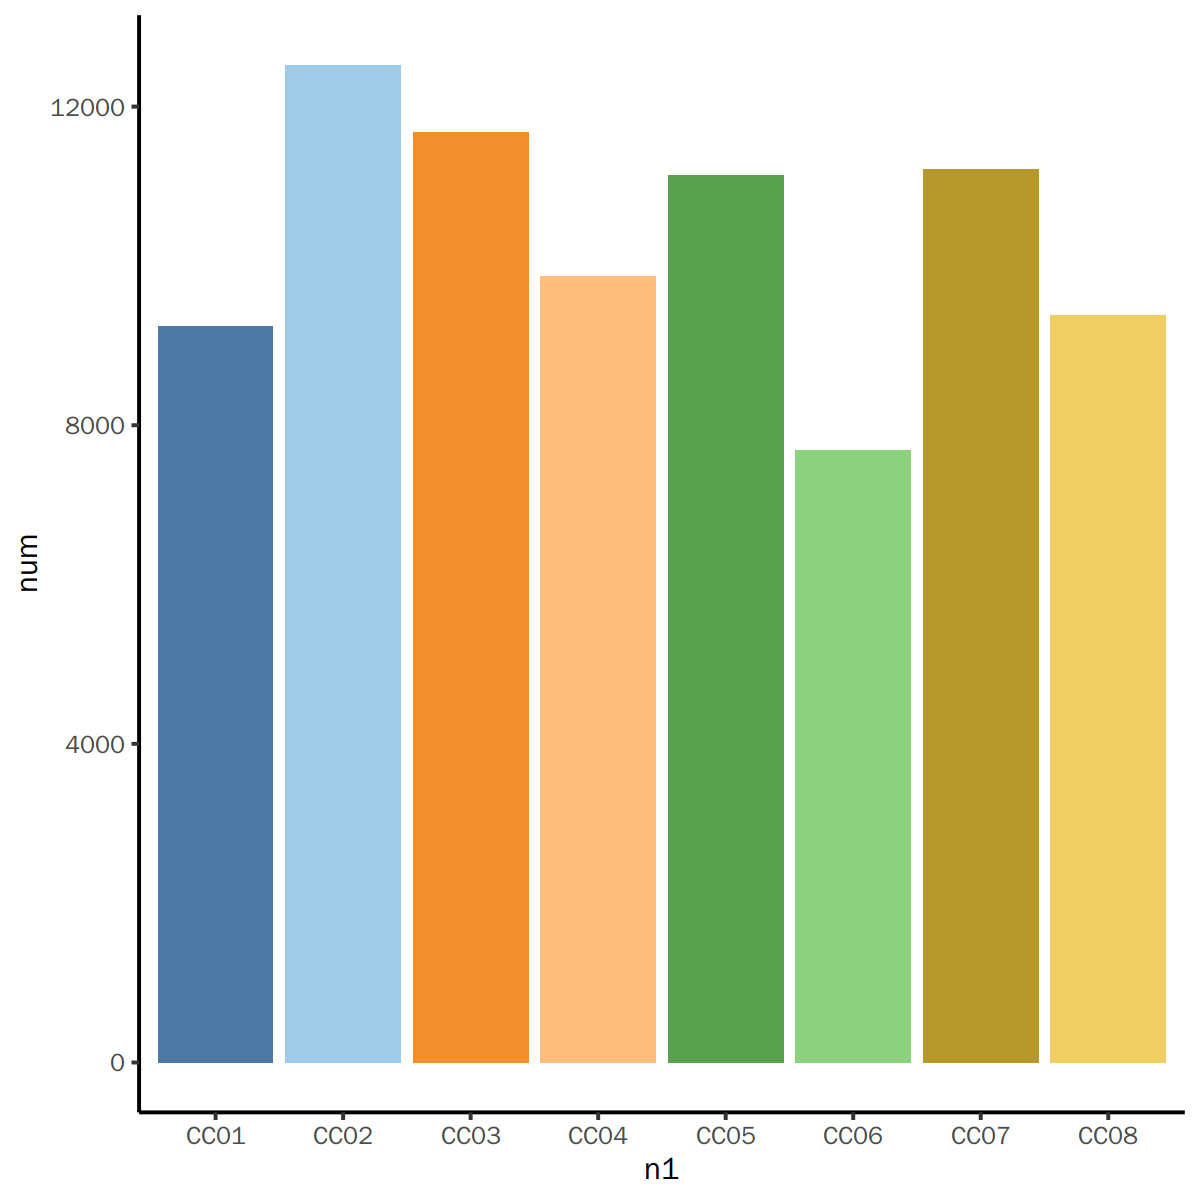

In [10]:
options(repr.plot.height =6, repr.plot.width = 6, repr.plot.res=200)
plot_cell_num_col(sc, "orig.ident")+ NoLegend()


Loading required package: RColorBrewer

Warning message:
“package ‘RColorBrewer’ was built under R version 4.0.5”
Loading required package: patchwork

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



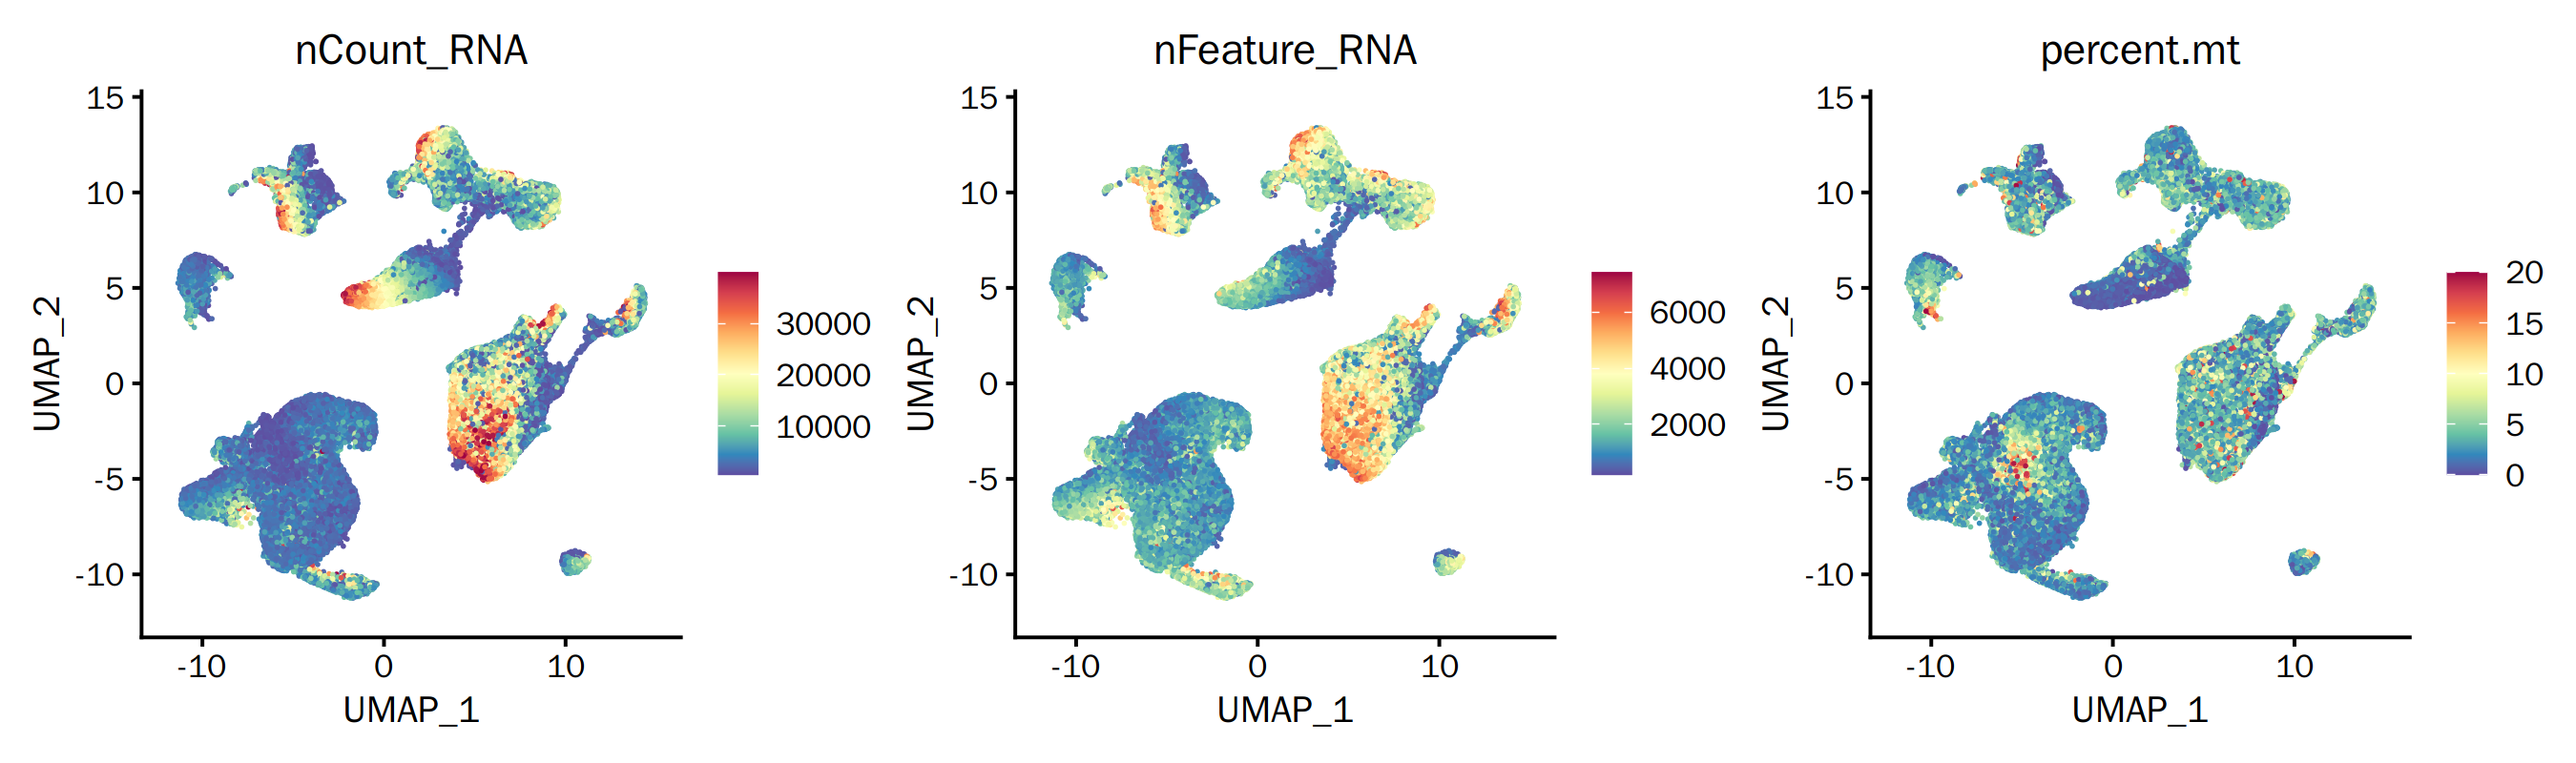

In [11]:
options(repr.plot.height =4, repr.plot.width = 13.5, repr.plot.res=200)
require("RColorBrewer")
require("patchwork")
s1 = FeaturePlot(sc, features=c("nCount_RNA"), label=FALSE)+scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "Spectral")))
s2 = FeaturePlot(sc, features=c("nFeature_RNA"), label=FALSE)+scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "Spectral")))
s3 = FeaturePlot(sc, features=c("percent.mt"), label=FALSE)+scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "Spectral")))
p = s1 + s2 + s3 + plot_layout(ncol =3)
p


In [12]:
plot_cluster_percent_bar <- function(object, x, color.by, color=FALSE) {
    require(ggplot2)
    require(ggthemes)
    batch_numbef <- aggregate(object@meta.data[color.by][,1], by=list(object@meta.data[color.by][,1], object@meta.data[x][,1]), FUN = length)
    names(batch_numbef) = c("n1", "n2", "num")
    
    batch2 <- aggregate(object@meta.data[x][,1], by=list(object@meta.data[x][,1]), FUN = length)
    
    percent = c()
    for (i in rownames(batch_numbef)) {
        k = batch_numbef[i,]

        percent = c(percent, 100*k$num/batch2$x[batch2$Group.1 == as.character(k$n2)])
    }

    batch_numbef["percent"] = percent
    batch_numbef$n1 = factor(batch_numbef$n1)
    if (identical(color, FALSE)) {
        plot = ggplot(data=batch_numbef, aes(x=as.factor(n2), y=percent, fill=n1)) + geom_col() +  scale_fill_tableau("Tableau 20") + labs(x = x, fill =color.by) 
    } else {
        plot = ggplot(data=batch_numbef, aes(x=as.factor(n2), y=percent, fill=n1)) + geom_col() +  scale_fill_manual(values=color) + labs(x = x, fill =color.by)
          
    }

    return(plot)
}

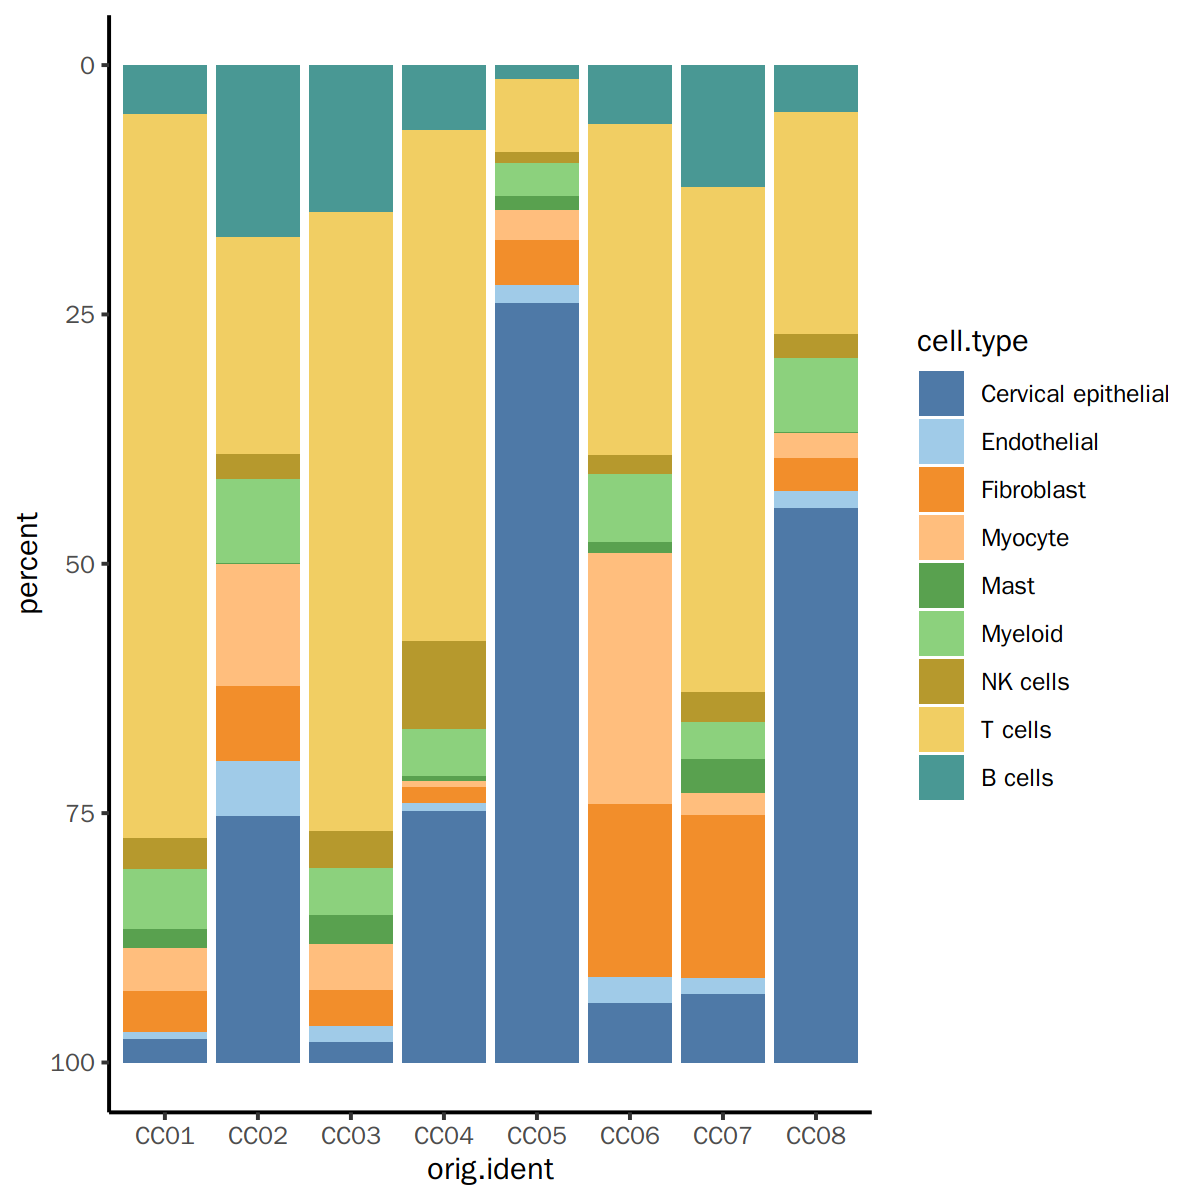

In [13]:
options(repr.plot.height =6, repr.plot.width = 6, repr.plot.res=200)
p = plot_cluster_percent_bar(sc,x="orig.ident", color.by="cell.type")  + theme_classic() + scale_y_reverse()
p


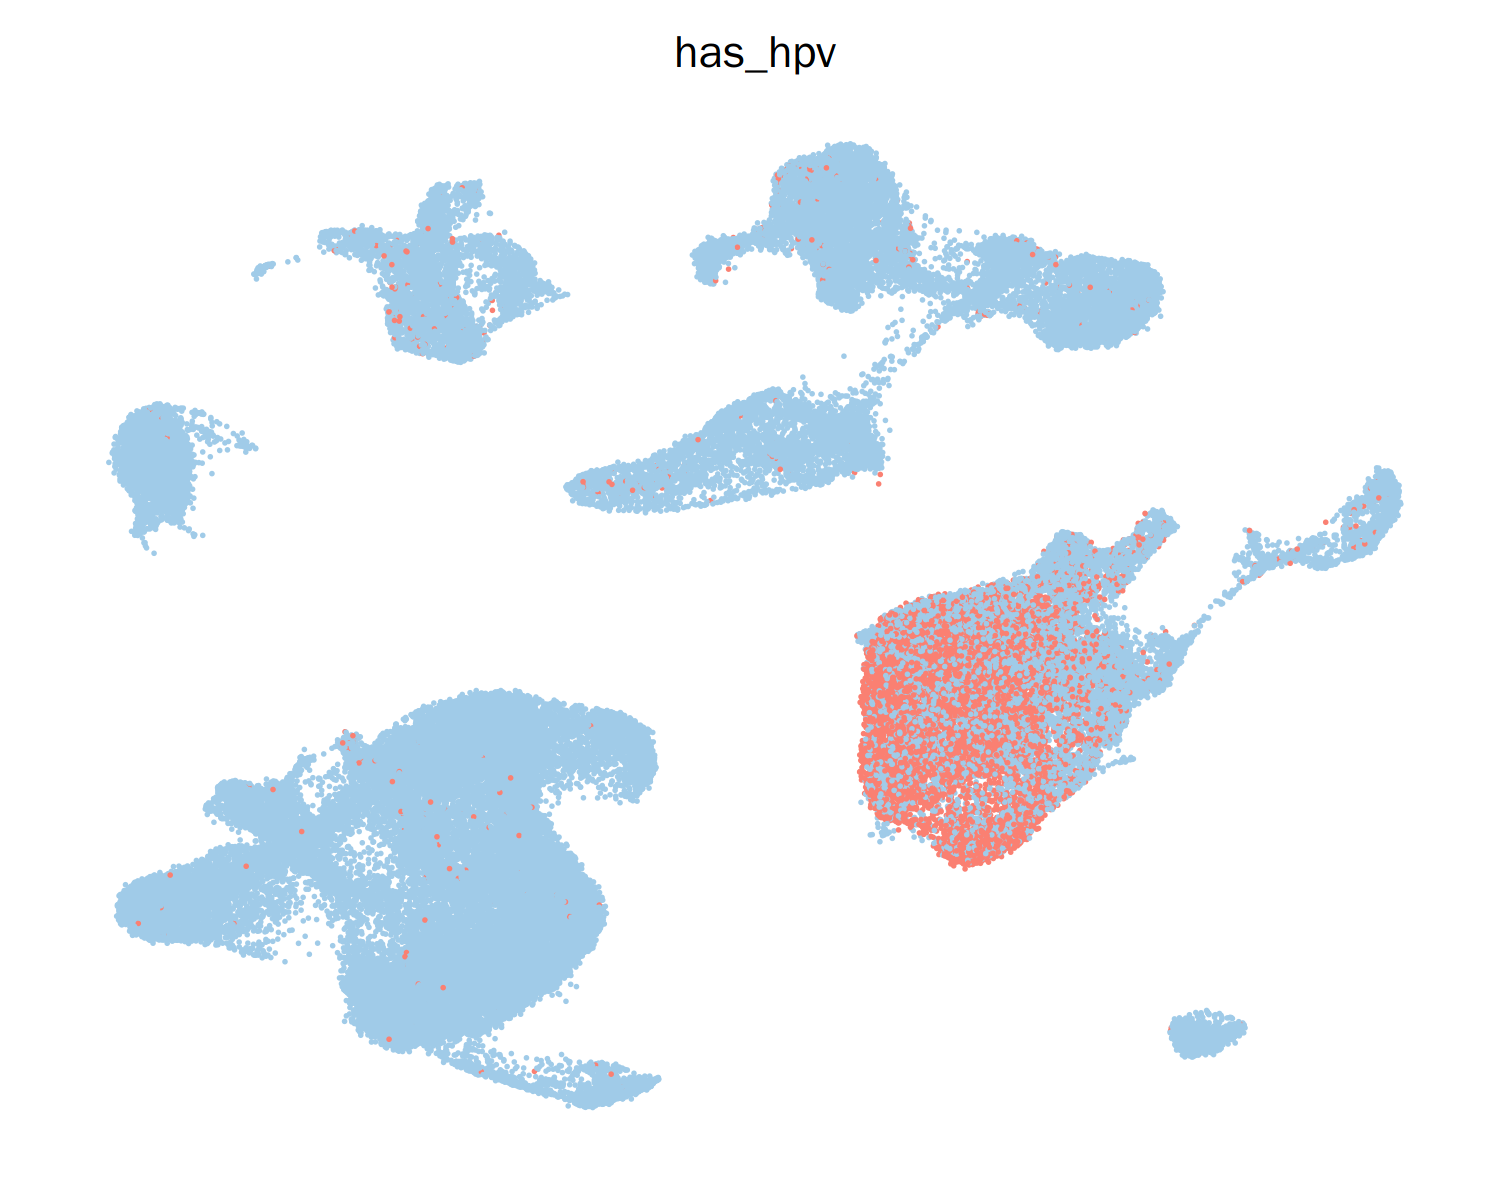

In [18]:
options(repr.plot.height =6, repr.plot.width = 7.5, repr.plot.res=200)
DimPlot(sc, group.by="has_hpv", pt.size=0.01, label = F, raster=F, cols=c("#a0cbe8", "salmon")) + NoAxes() + NoLegend()

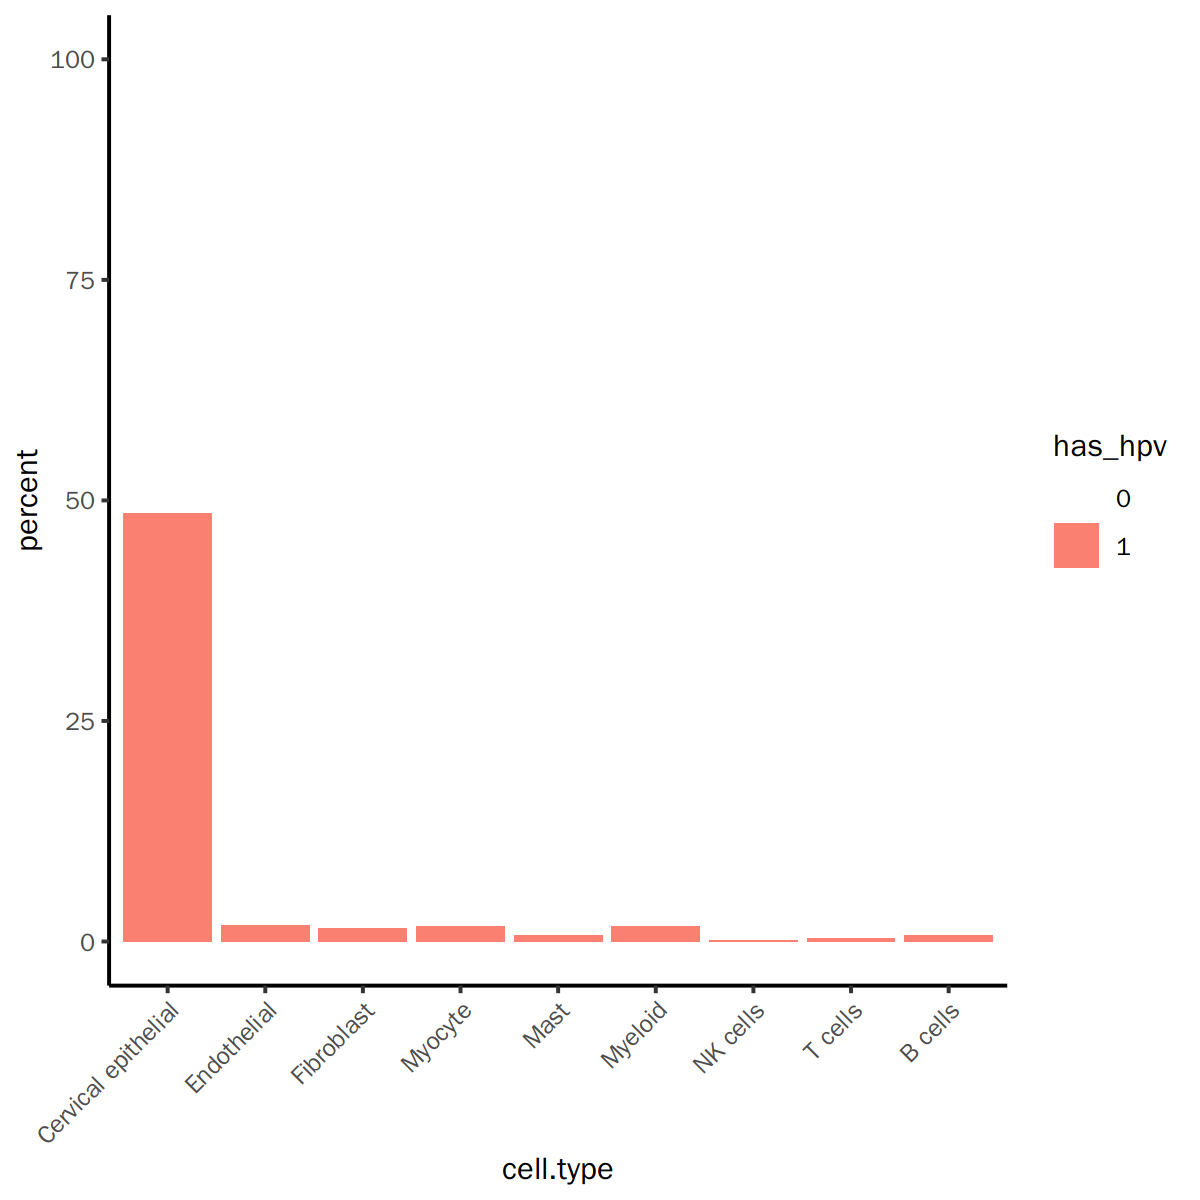

In [14]:
options(repr.plot.height =6, repr.plot.width = 6, repr.plot.res=200)
p = plot_cluster_percent_bar(sc,x="cell.type", color.by="has_hpv", color = c("white", "salmon")) 
p + theme_classic() + theme(axis.text.x = element_text(angle=45, hjust=1))

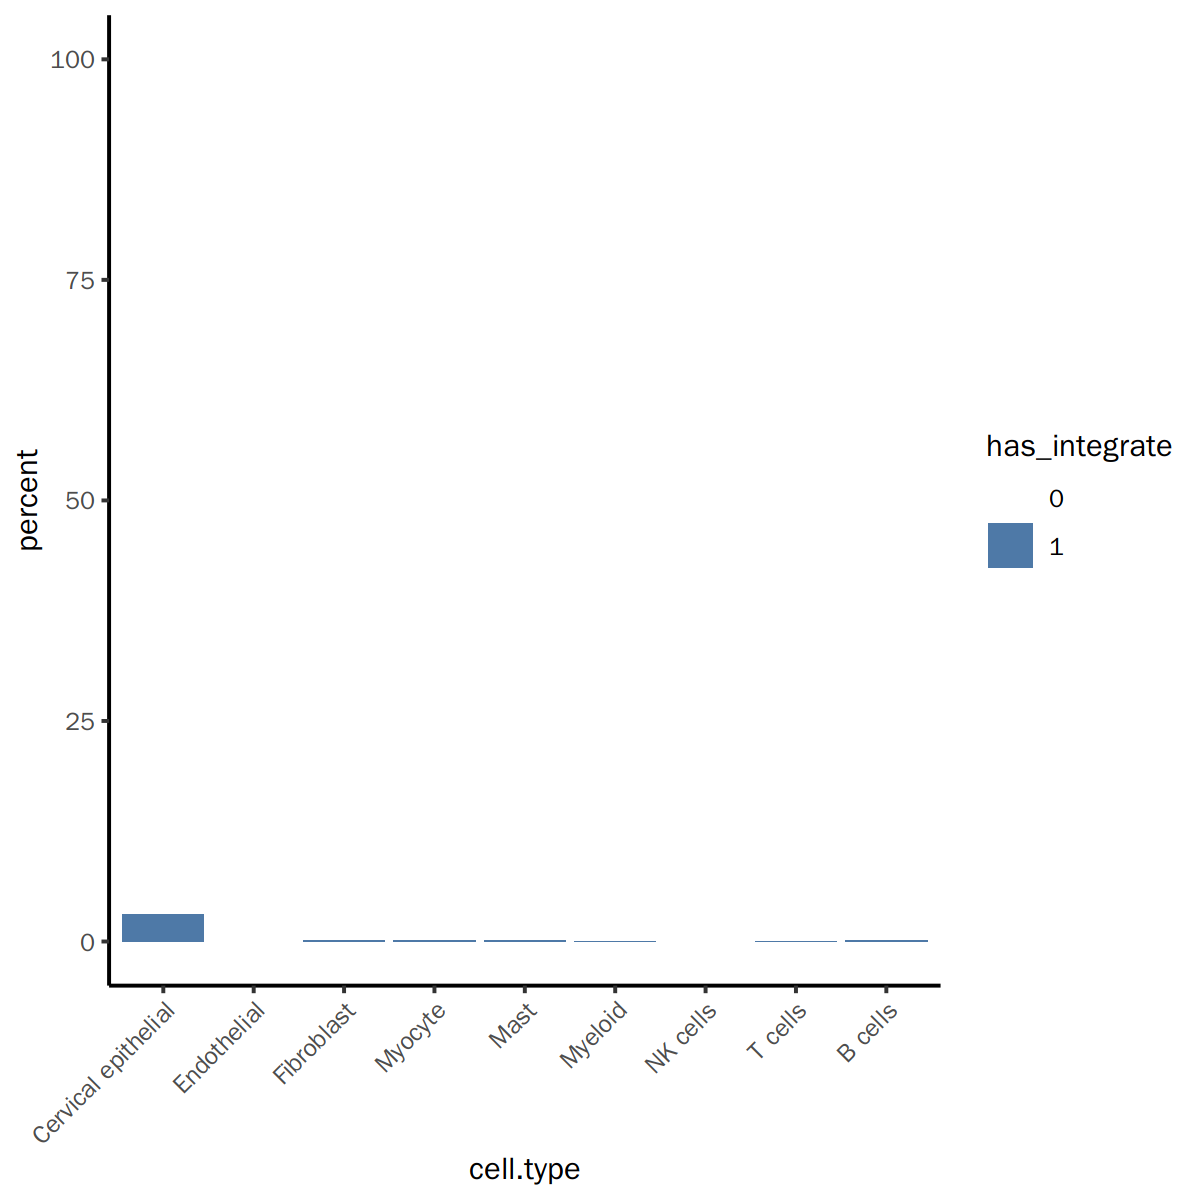

In [15]:
options(repr.plot.height =6, repr.plot.width = 6, repr.plot.res=200)
p = plot_cluster_percent_bar(sc,x="cell.type", color.by="has_integrate", color = c("white", "#4e79a7")) 
p + theme_classic() + theme(axis.text.x = element_text(angle=45, hjust=1))

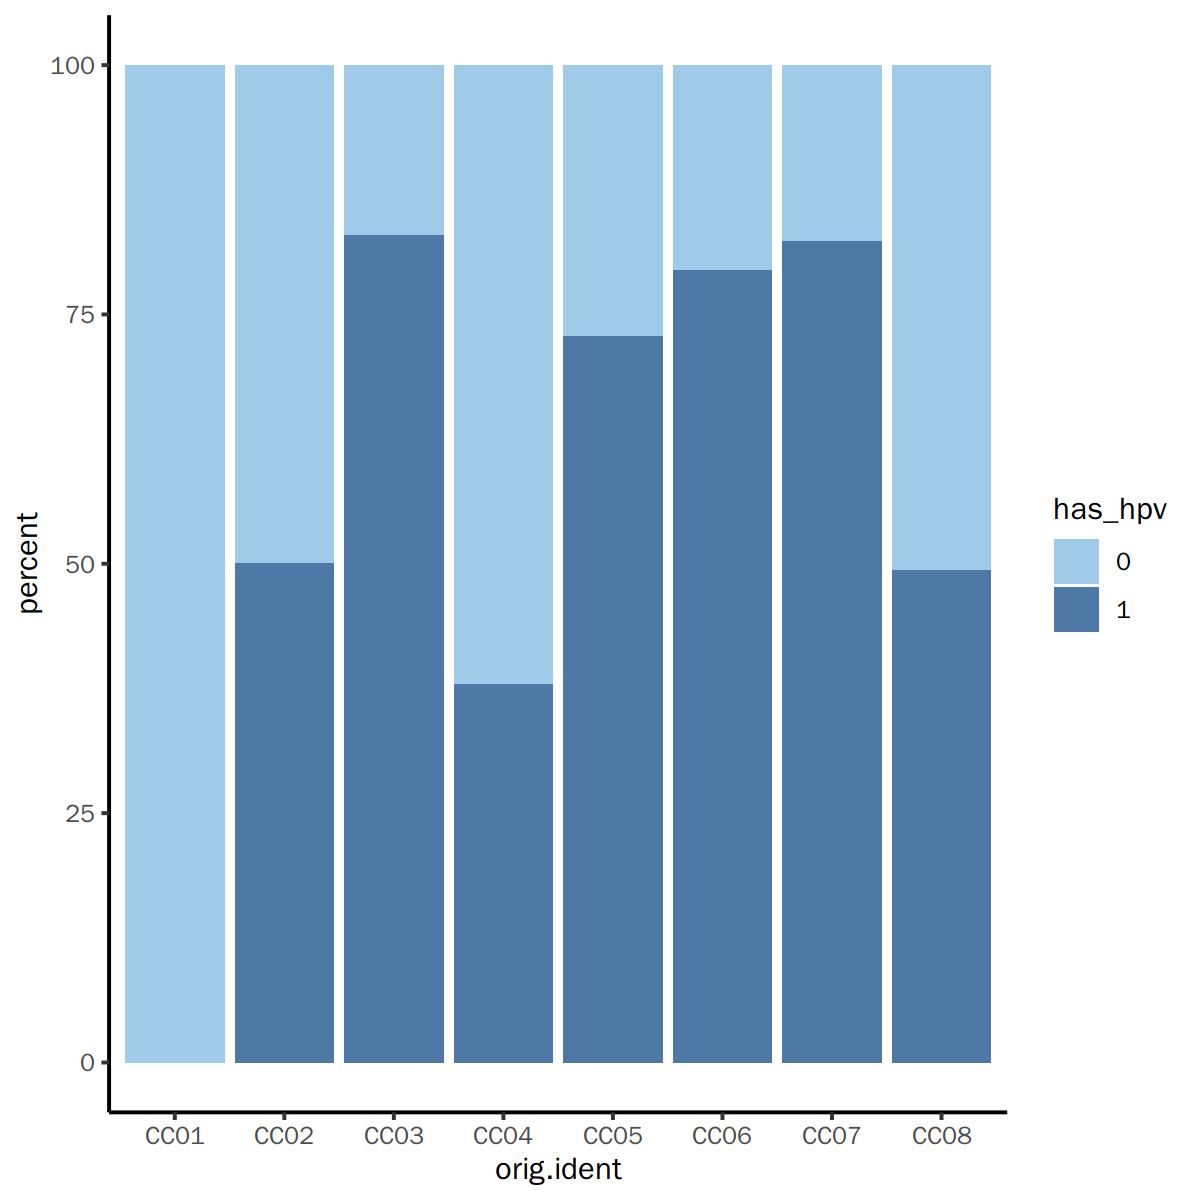

In [16]:
options(repr.plot.height =6, repr.plot.width = 6, repr.plot.res=200)
p = plot_cluster_percent_bar(subset(sc, subset=cell.type=="Cervical epithelial" & is_tumor=="aneuploid"),x="orig.ident", color.by="has_hpv", color = c("#a0cbe8", "#4e79a7")) 
p + theme_classic()


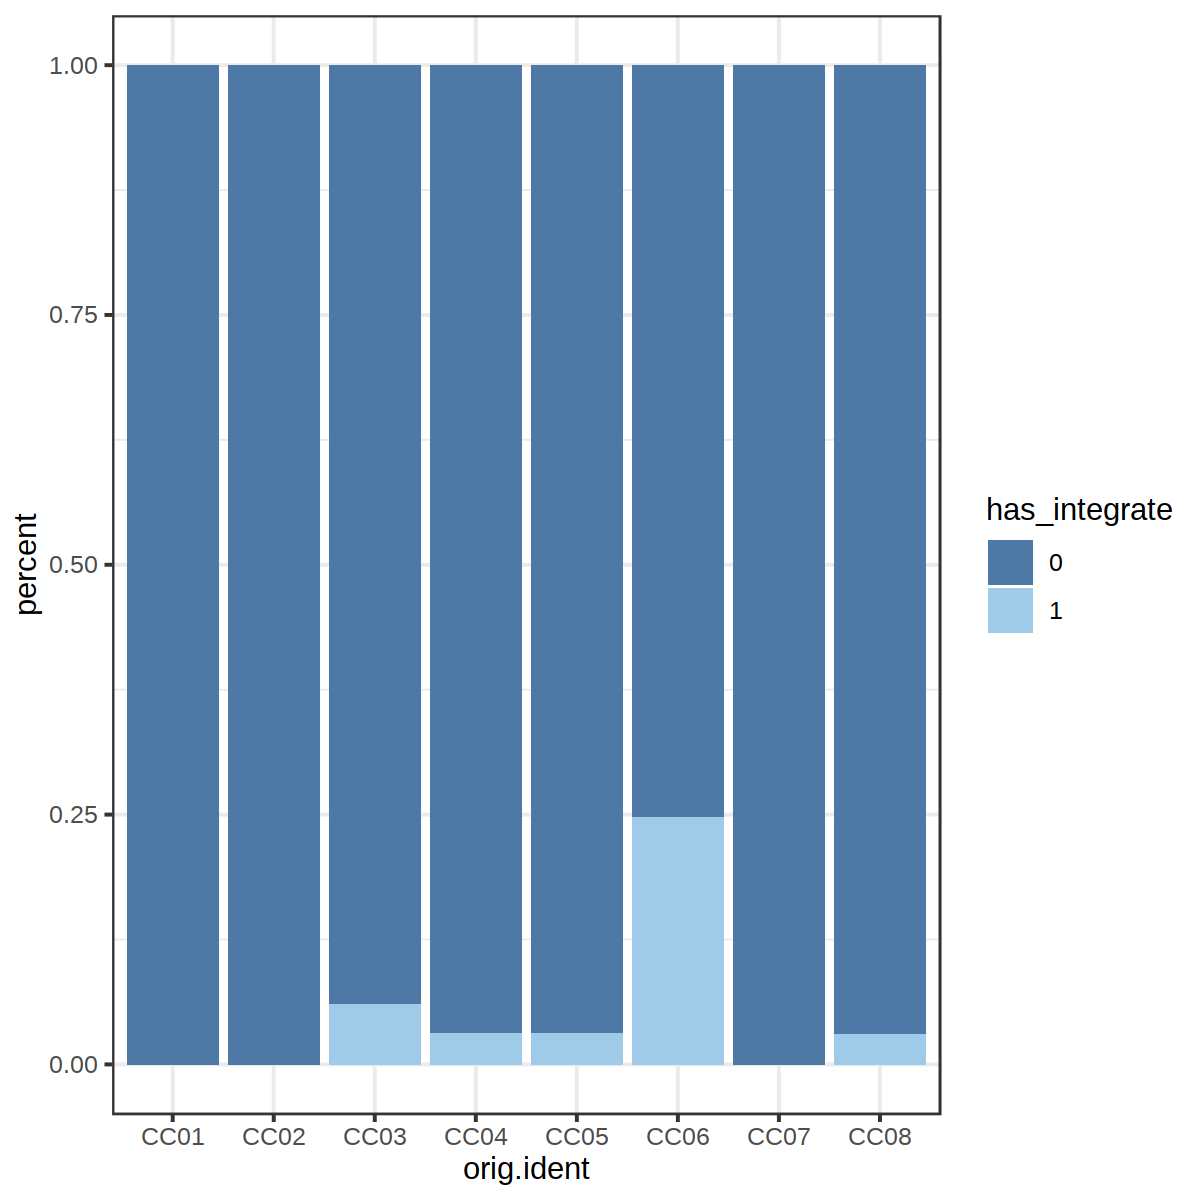

In [57]:
options(repr.plot.height =6, repr.plot.width = 6, repr.plot.res=200)
p = plot_cluster_percent_bar(subset(sc, subset=cell.type=="Cervical epithelial" & is_tumor=="aneuploid"),x="orig.ident", color.by="has_integrate") 
p + theme_bw()

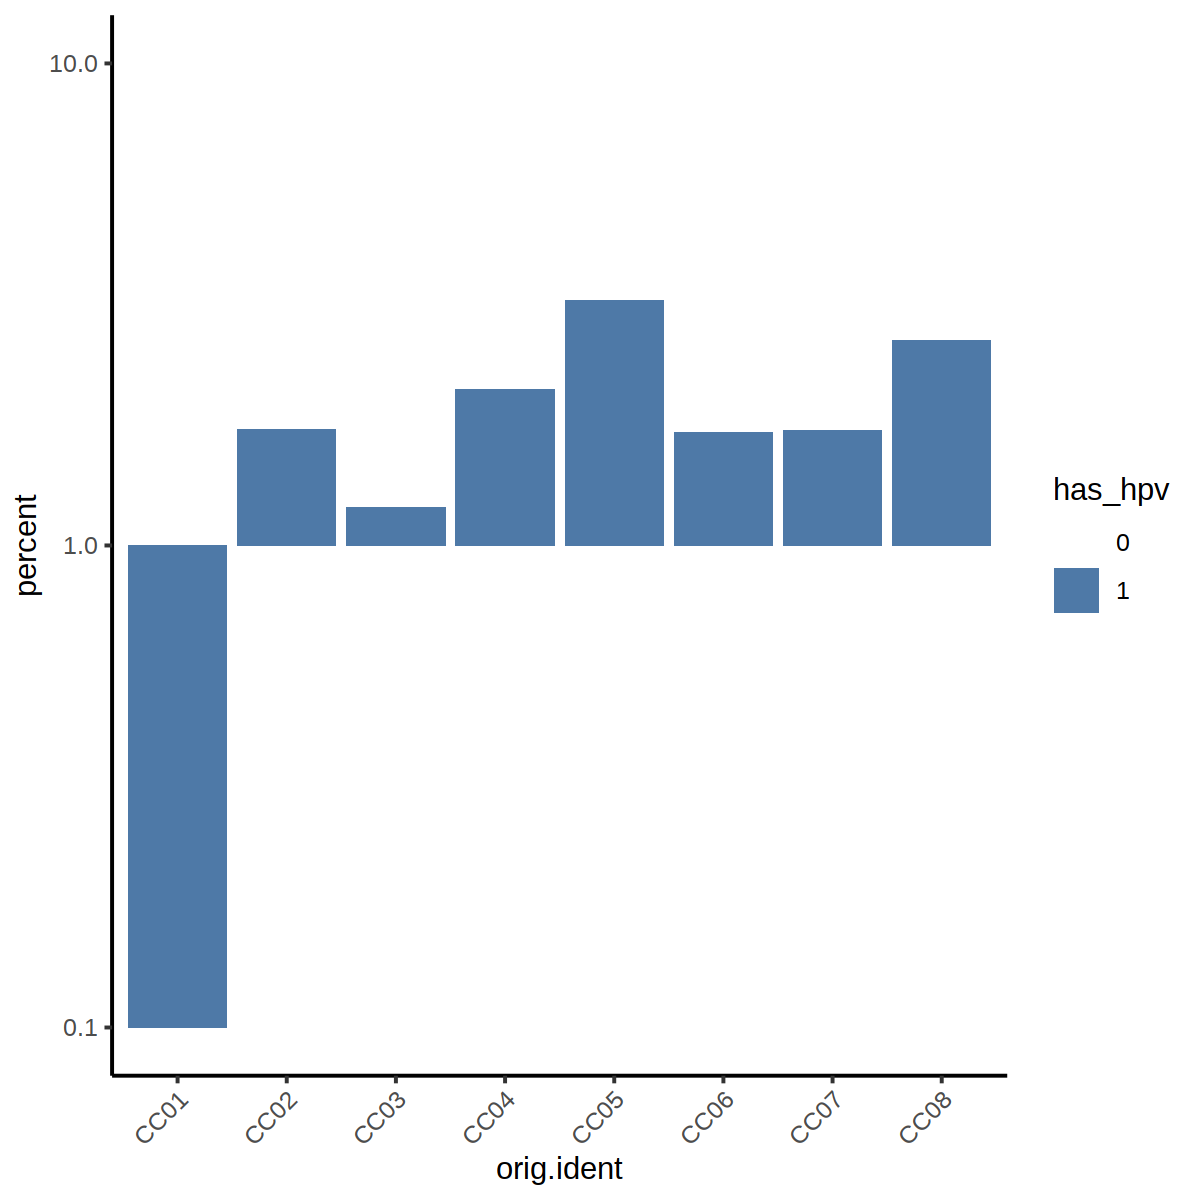

In [48]:
options(repr.plot.height =6, repr.plot.width = 6, repr.plot.res=200)
p = plot_cluster_percent_bar(sc,x="orig.ident", color.by="has_hpv", color = c("white", "#4e79a7")) 
p + theme_classic() + theme(axis.text.x = element_text(angle=45, hjust=1)) +scale_y_log10()
ggsave("figures/hpv_by_patient_hist.pdf", width = 6, height=6)

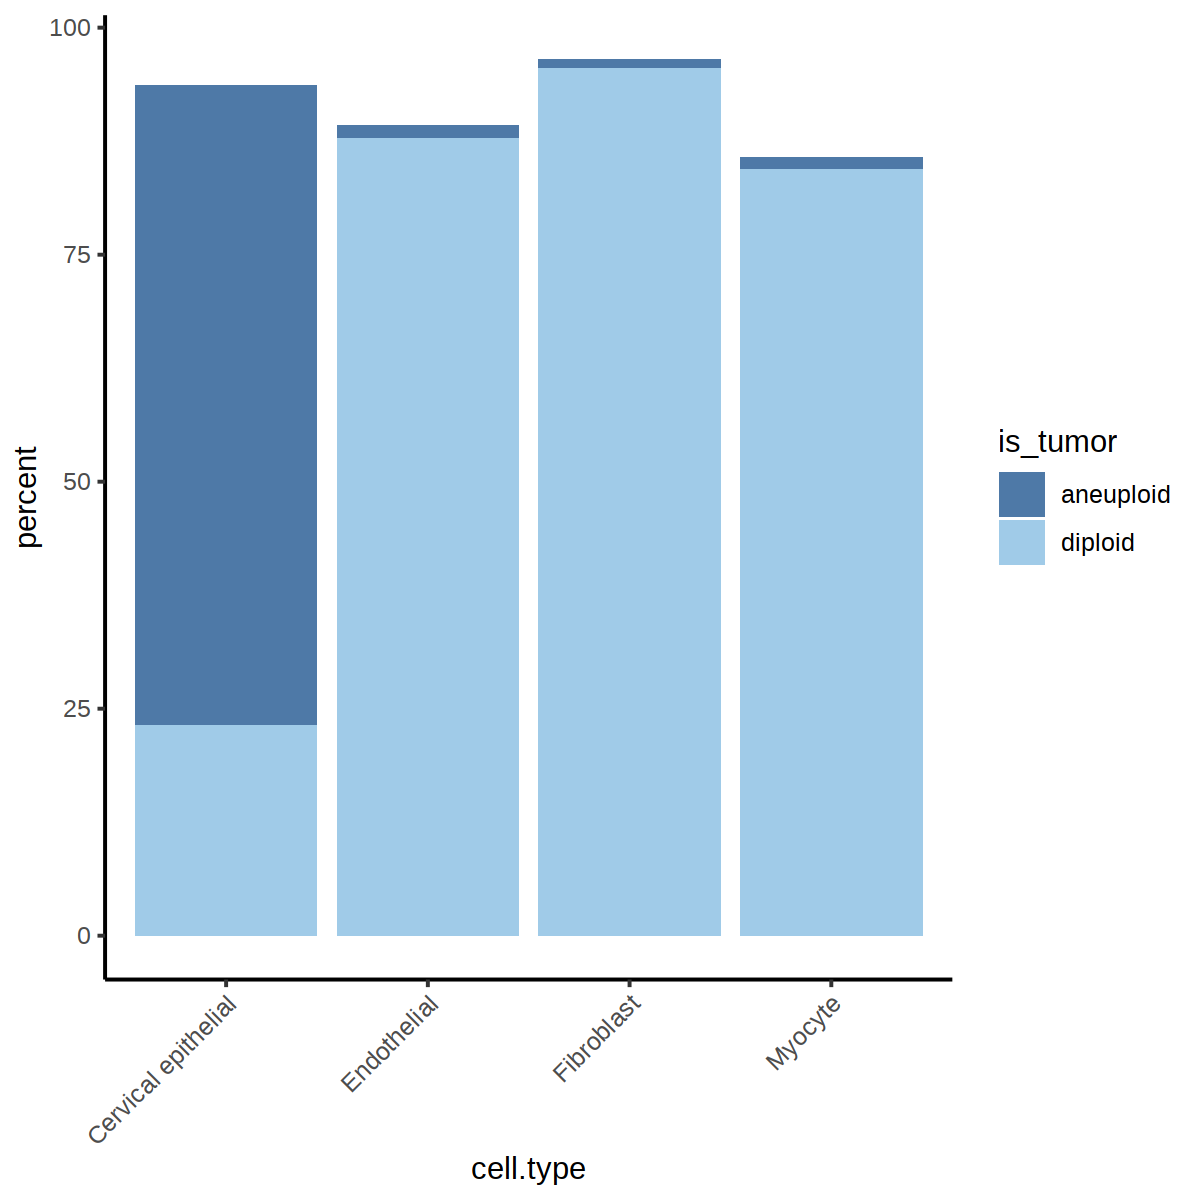

In [115]:
options(repr.plot.height =6, repr.plot.width = 6, repr.plot.res=200)
p = plot_cluster_percent_bar(sc,x="cell.type", color.by="is_tumor", color = c("#4e79a7", "#a0cbe8", "lightgrey")) 
p + theme_classic() + theme(axis.text.x = element_text(angle=45, hjust=1))

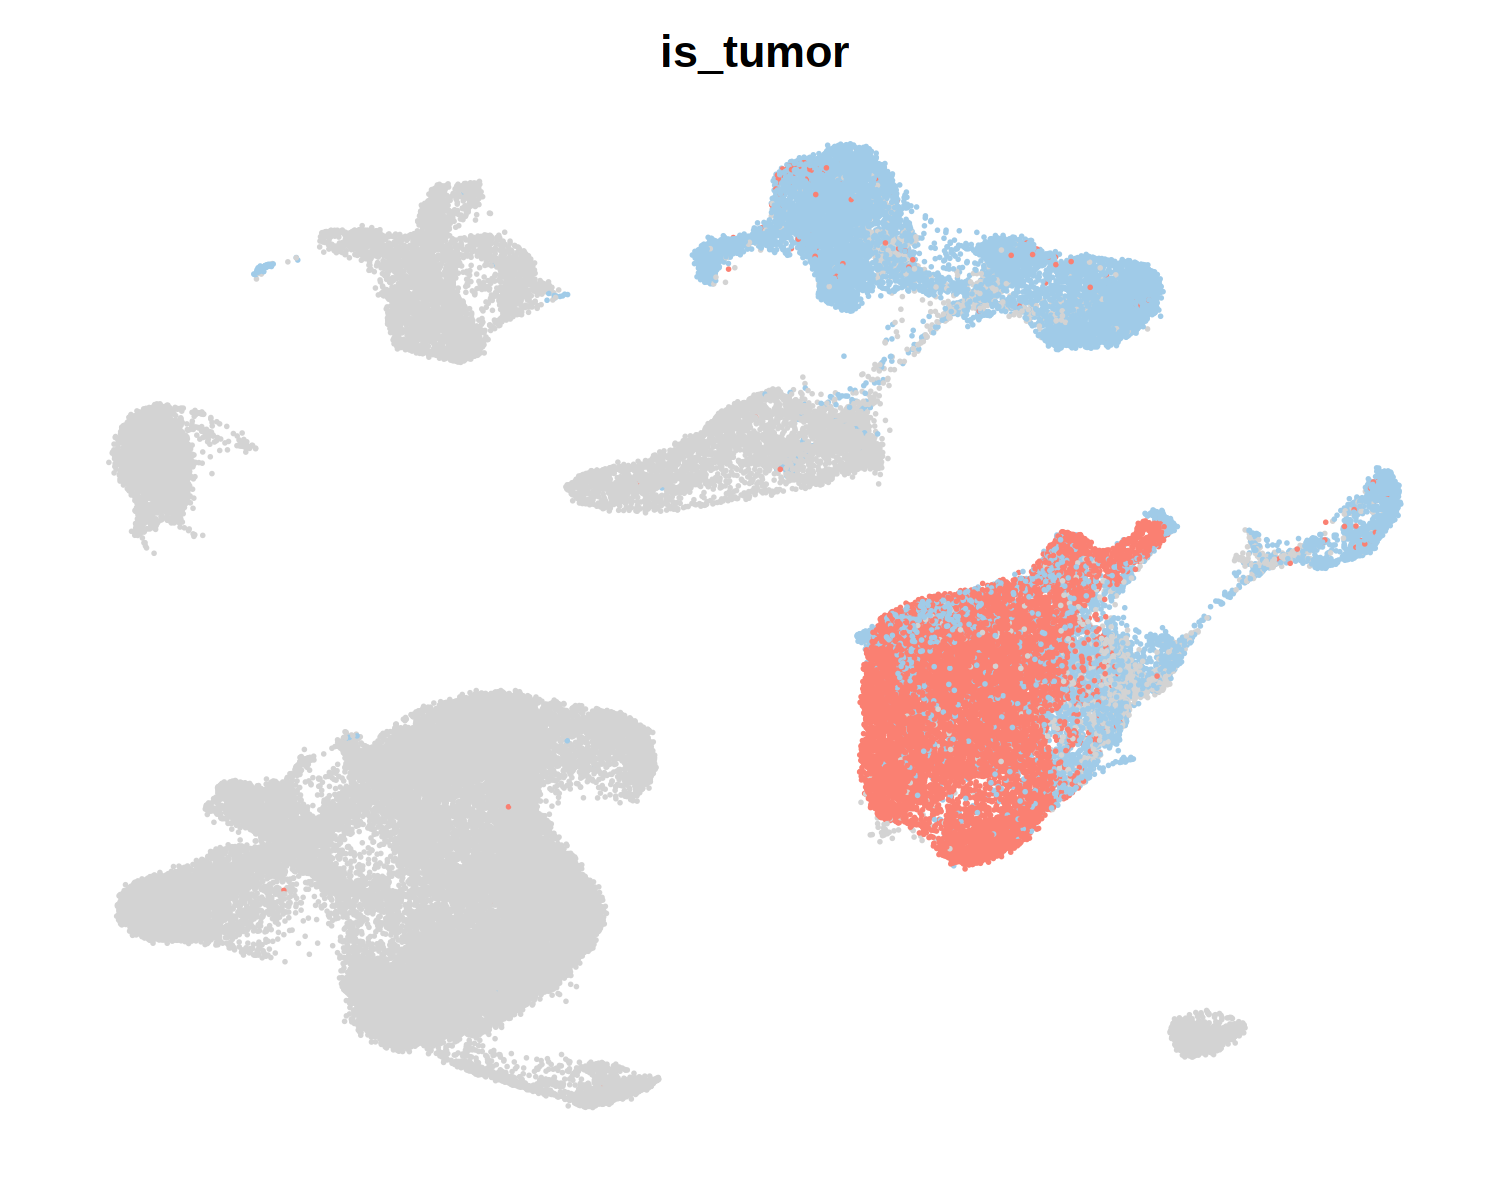

In [149]:
options(repr.plot.height =6, repr.plot.width = 7.5, repr.plot.res=200)
DimPlot(sc, group.by="is_tumor", pt.size=0.01, label = F, raster=F, cols=c("salmon", "#a0cbe8"), na.value = "lightgrey") + NoAxes() + NoLegend()

In [19]:
epc = readRDS("data/epc.rds")
epc

An object of class Seurat 
30397 features across 20672 samples within 2 assays 
Active assay: RNA (27397 features, 0 variable features)
 1 other assay present: integrated
 3 dimensional reductions calculated: pca, umap, tsne

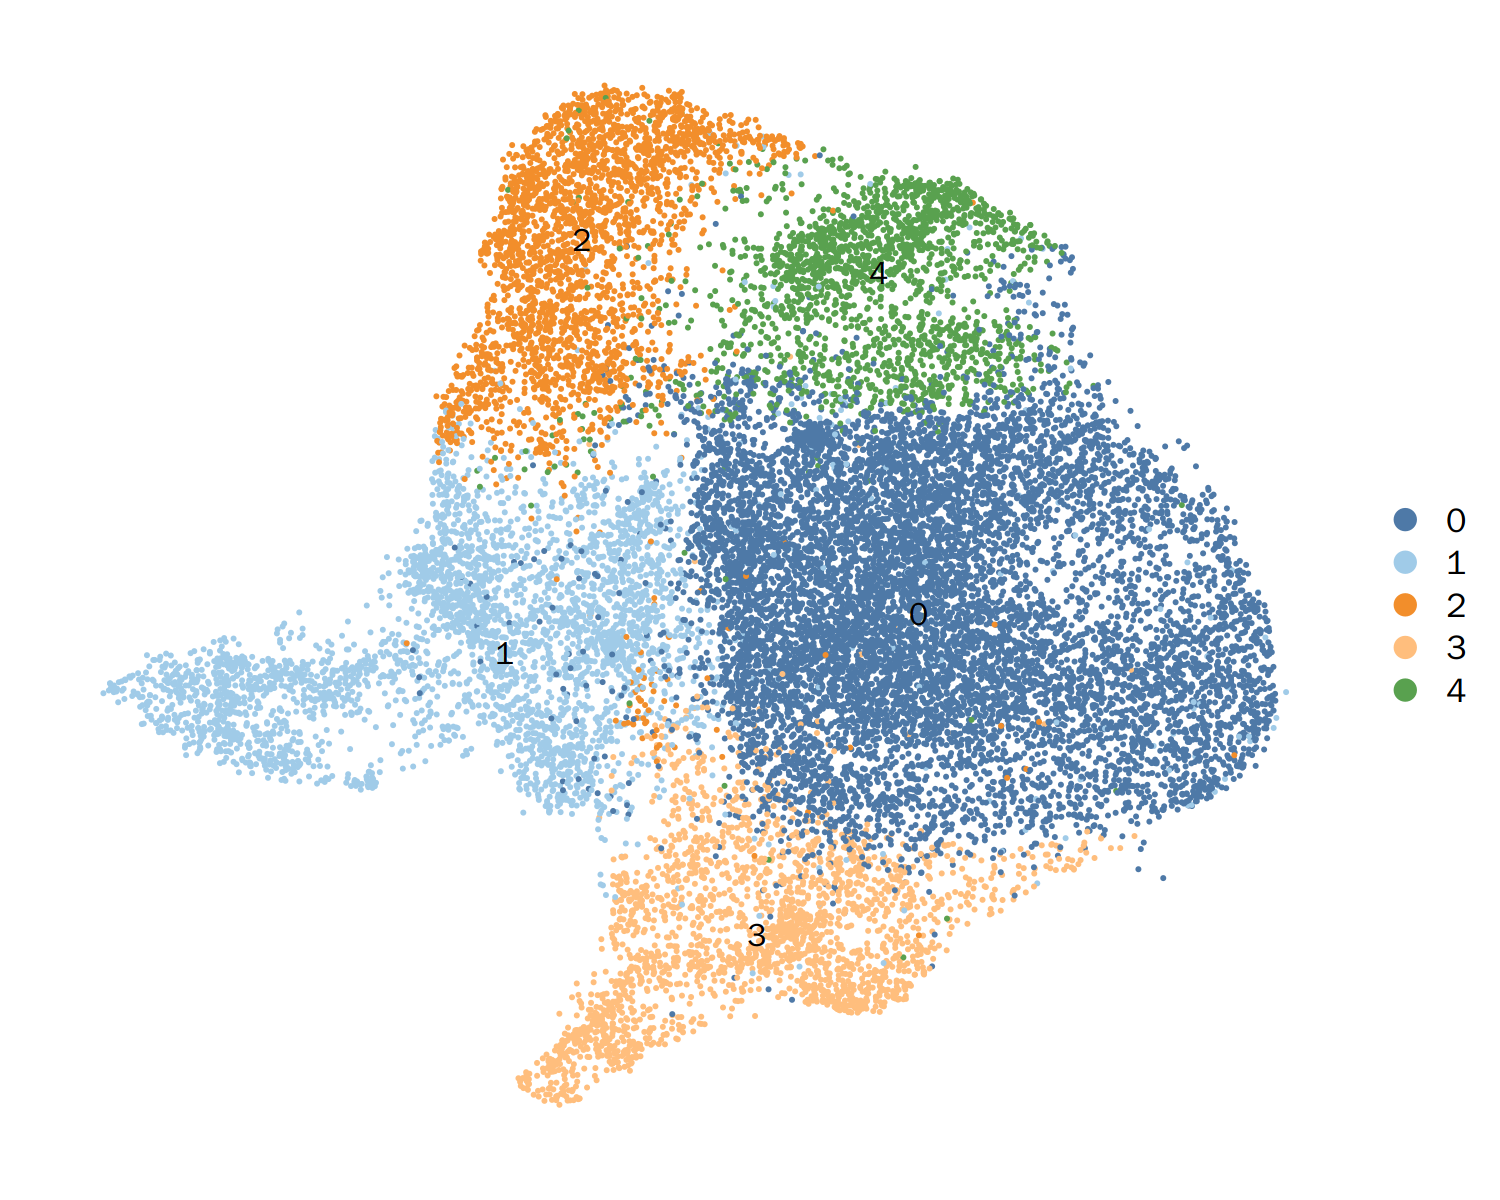

In [20]:
DimPlot(epc,  label = T, raster=F) + NoAxes()  +  scale_colour_tableau("Tableau 20") 

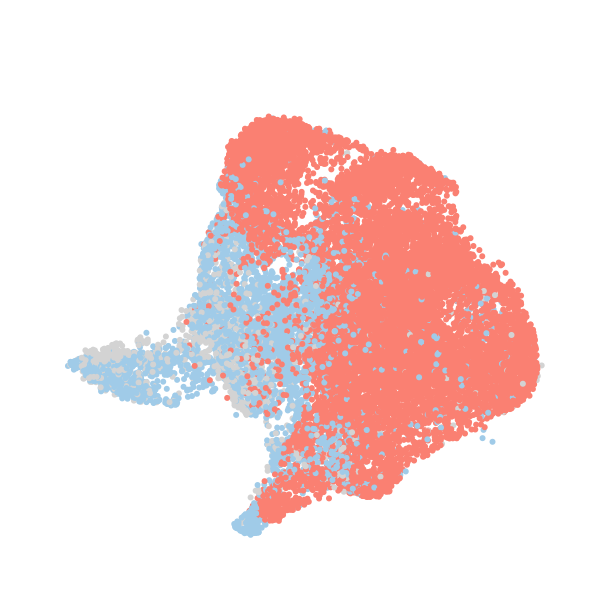

In [22]:
options(repr.plot.height =3, repr.plot.width = 3, repr.plot.res=200)
DimPlot(epc, group.by="is_tumor",label = F, raster=F, cols=c("salmon", "#a0cbe8"), na.value = "lightgrey", order=F) + NoAxes() + NoLegend() +ggtitle("")

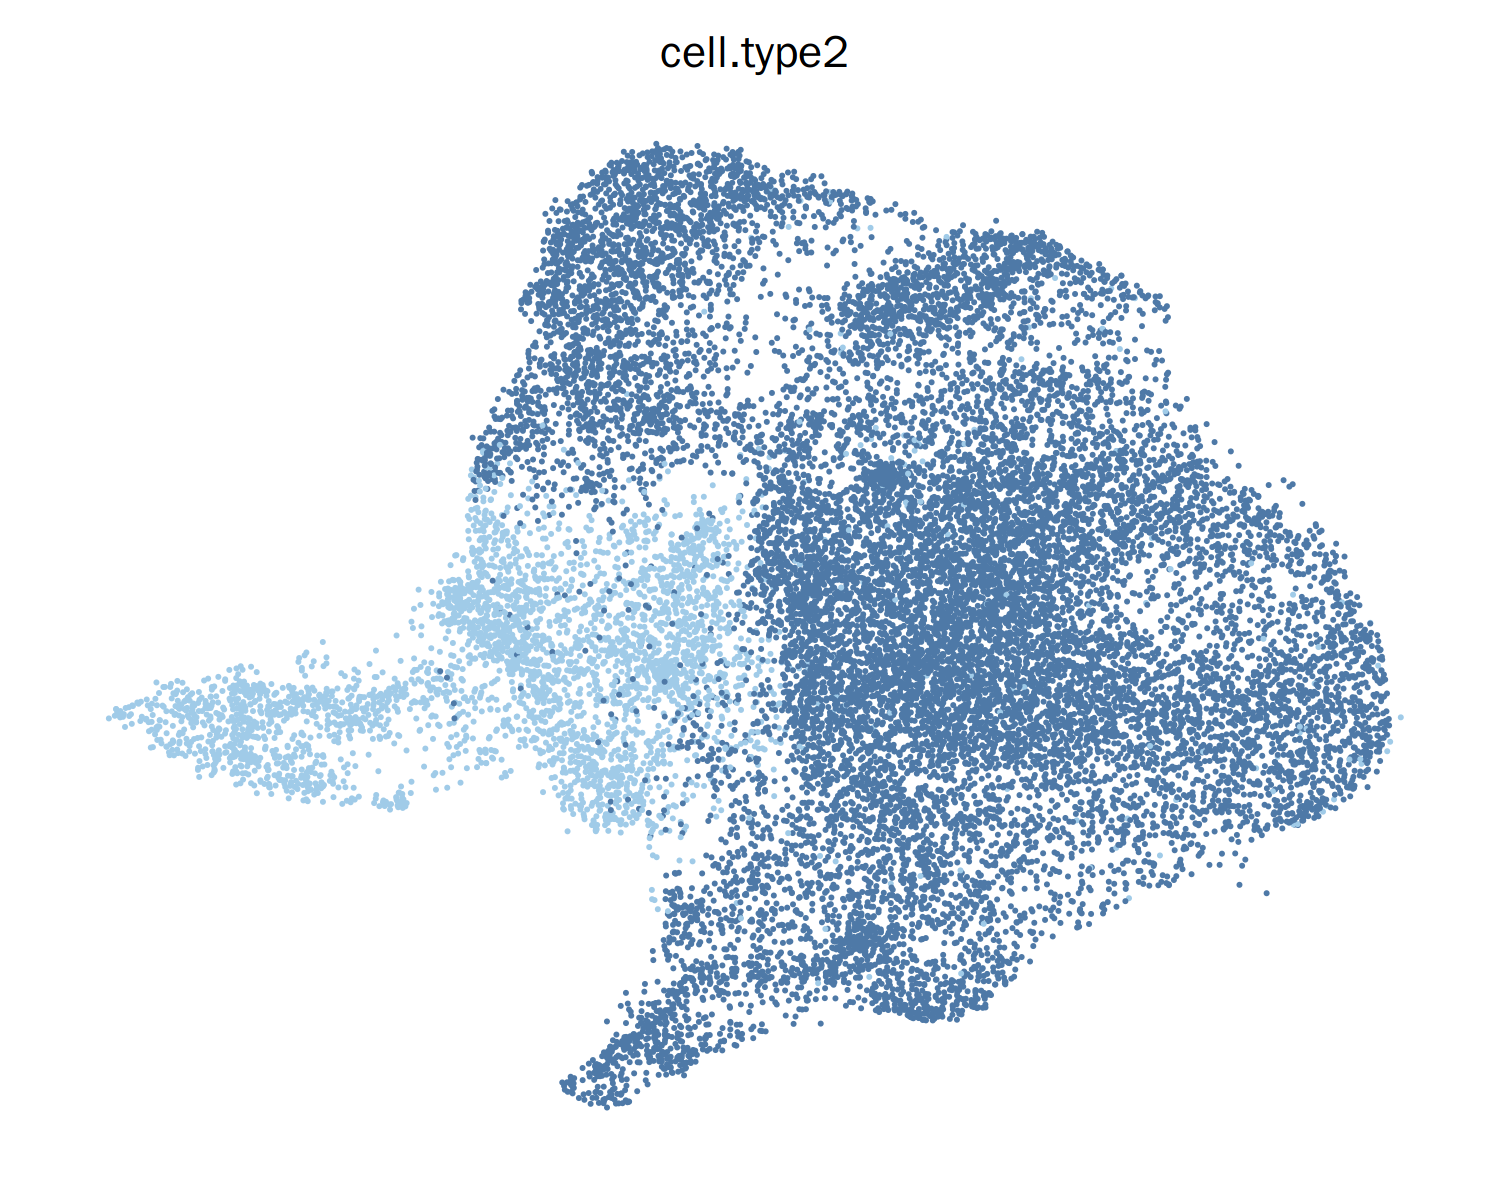

In [24]:
options(repr.plot.height =6, repr.plot.width = 7.5, repr.plot.res=200)
DimPlot(epc, group.by="cell.type2",label = F, raster=F, cols=c("#a0cbe8", "#4e79a7"), na.value = "lightgrey") + NoAxes() + NoLegend()

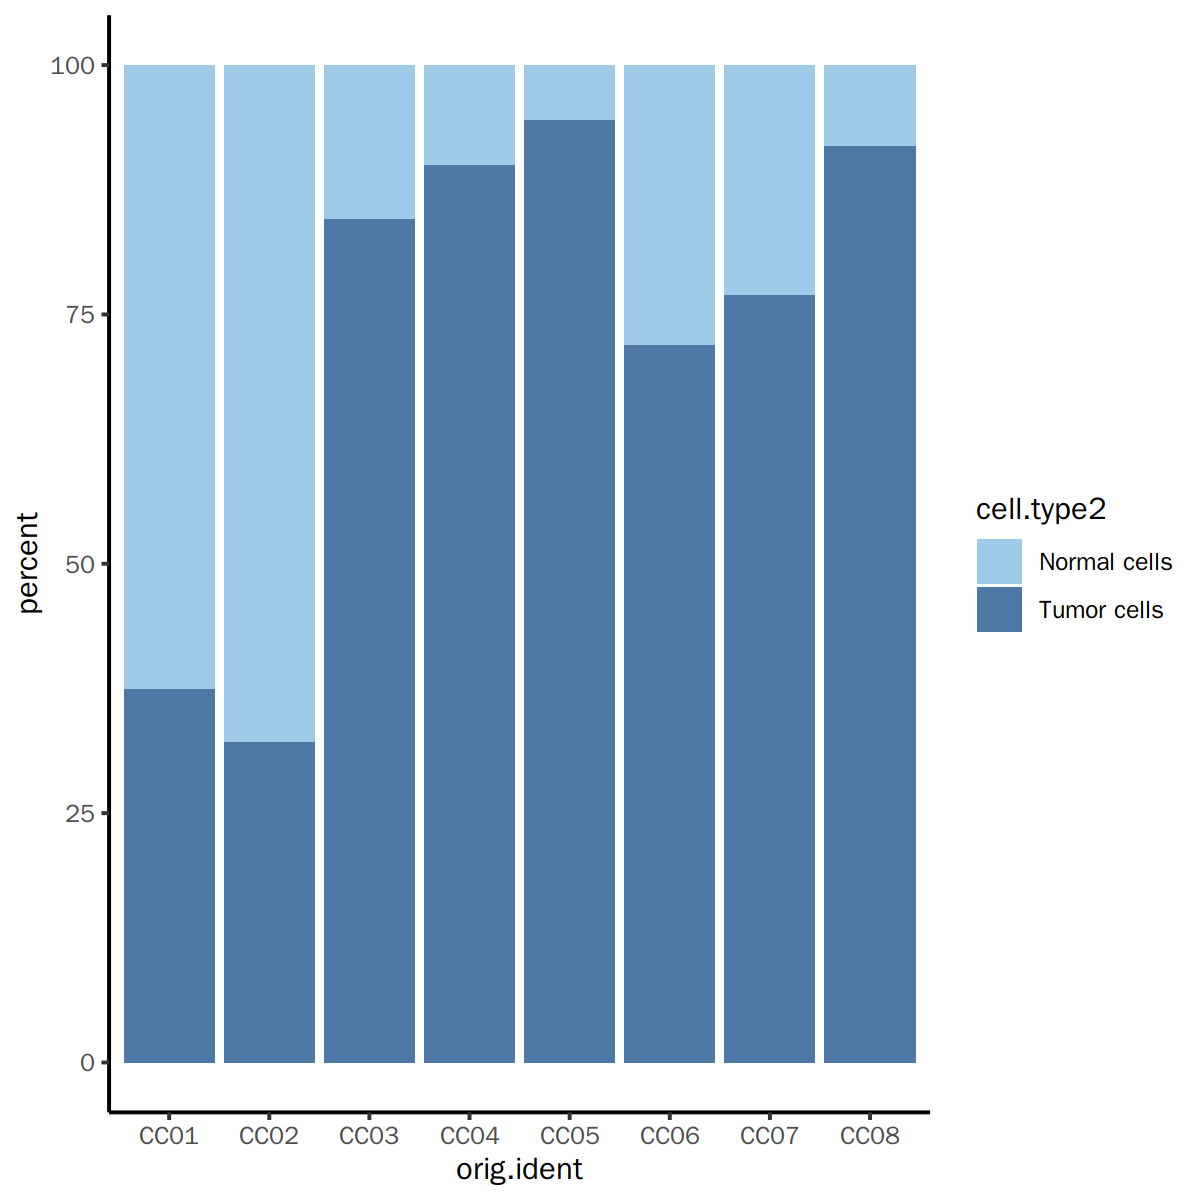

In [25]:
options(repr.plot.height =6, repr.plot.width = 6, repr.plot.res=200)
p = plot_cluster_percent_bar(epc, x="orig.ident", color.by="cell.type2", color=c("#a0cbe8", "#4e79a7")) 
p + theme_classic()

In [28]:
do_gsea_simple <- function(adata, group.by, ident.1, ident.2, category, subcategory=F) {
    
    require(presto)
    require(msigdbr)

    require(fgsea)
    require(dplyr)
    require(ggplot2)
    require(tidyverse)
    
    
    genes <- wilcoxauc(adata,  group.by, groups_use=c(ident.1, ident.2))
    
    m_df<- msigdbr(species = "Homo sapiens", category = category, subcategory=subcategory)
    fgsea_sets<- m_df %>% split(x = .$gene_symbol, f = .$gs_name)
    
    genes1 <- genes %>%
    dplyr::filter(group == ident.1) %>%
    arrange(desc(auc)) %>%
    dplyr::select(feature, auc)
    ranks1 <- deframe(genes1)
    
    
    fgsea1<- fgsea(fgsea_sets, stats = ranks1, eps=0, minSize  = 15,
                  maxSize  = 500)

    fgseaResTidy1 <- fgsea1 %>%
    as_tibble() %>%
    arrange(desc(NES))
  
    p1 = ggplot(fgseaResTidy1 %>% filter(padj < 0.01) %>% head(n= 5), aes(reorder(pathway, NES), NES)) +
      geom_col(fill="red") +
      coord_flip() +
      labs(x="Pathway", y="Normalized Enrichment Score",
           title="Hallmark pathways NES from GSEA") +
      theme_minimal()
    
    
    return(list(data=fgseaResTidy1, p=p1, rank=genes))
}

In [29]:
tumor = subset(epc, subset=cell.type2=="Tumor cells")

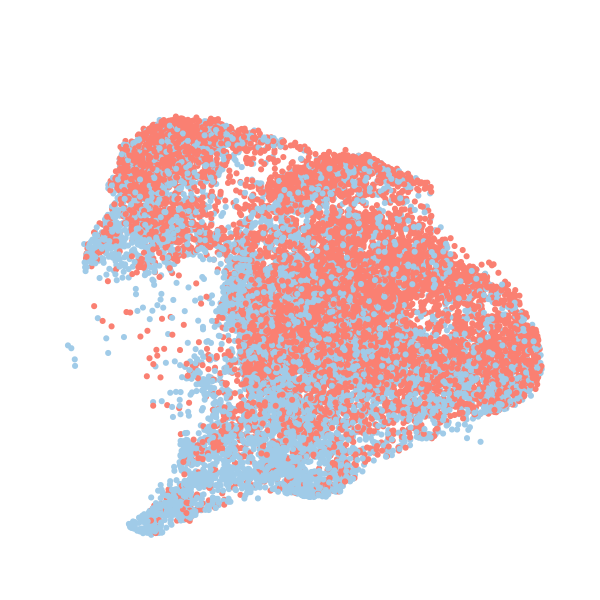

In [26]:
options(repr.plot.height =3, repr.plot.width = 3, repr.plot.res=200)
DimPlot(tumor, group.by="has_hpv",label = F, raster=F, , cols=c("#a0cbe8", "salmon"), order=F) + NoAxes() + NoLegend() +ggtitle("")

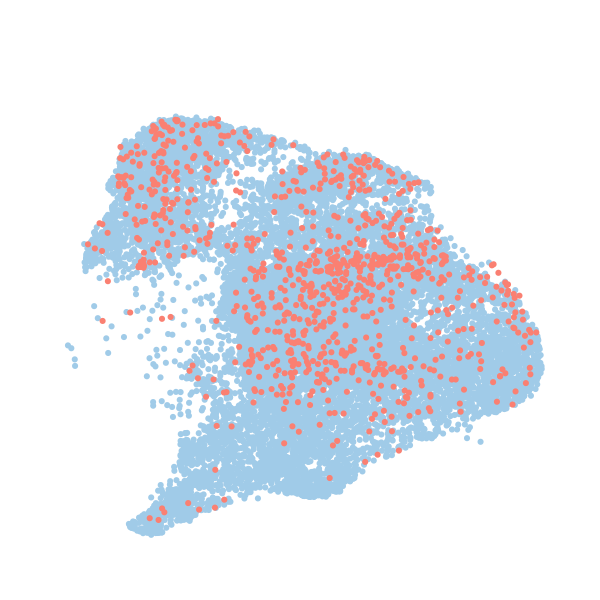

In [27]:
options(repr.plot.height =3, repr.plot.width = 3, repr.plot.res=200)
DimPlot(tumor, group.by="has_integrate",label = F, raster=F, cols=c("#a0cbe8", "salmon"), order=T) + NoAxes() + NoLegend() +ggtitle("")

In [31]:
cal_hallmark_score <- function(object) {
    require(Seurat)
    require(dplyr)
    require(msigdbr)

    hallmark = msigdbr(species = "Homo sapiens", category = "H")
    
    gene_list = list()
    hallmark_names = unique(hallmark$gs_name)
    for (h in hallmark_names) {
        genes = hallmark[hallmark$gs_name == h,]$human_gene_symbol
        genes = list(genes[genes %in% rownames(object)])
        gene_list = append(gene_list, genes)
    }

    r = AddModuleScore(object, features=gene_list, name="hallmark")
    
    for (i in c(1:length(hallmark_names))) {
        names(r@meta.data)[names(r@meta.data)==paste0("hallmark",i)] <- hallmark_names[i]
    }
    return(r)
    }

In [32]:
plot_ssgsea_box <-function(object, group.by, score.by) {
    require(rstatix)
    require(dplyr)
    require(ggpubr)
    df = object@meta.data
    df["group"] = df[group.by]
    df["score"] = df[score.by]
    p1 <- ggboxplot(df, x = group.by, y=score.by,
          color = group.by, outlier.shape=NA,bxp.errorbar=T)
    
    stat.test = df %>% wilcox_test(score~group, p.adjust.method= "BH")
    stat.test <- stat.test %>% add_xy_position(x =group.by)
    p = p1 + stat_pvalue_manual(stat.test, label = "p") + ggtitle(score.by) + theme(
        axis.text.x = element_text(size=10, angle = 45, hjust=1))
    return(p)
}

In [38]:
library(dplyr)

Warning message:
“package ‘dplyr’ was built under R version 4.0.5”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [39]:
d = tumor@meta.data

In [36]:
colnames(d)

[1] "orig.ident"                                
 [2] "nCount_RNA"                                
 [3] "nFeature_RNA"                              
 [4] "percent.mt"                                
 [5] "percent.rp"                                
 [6] "percent.hpv"                               
 [7] "count.hpv"                                 
 [8] "integrated_snn_res.1"                      
 [9] "seurat_clusters"                           
[10] "integrated_snn_res.0"                      
[11] "integrated_snn_res.0.2"                    
[12] "integrated_snn_res.0.4"                    
[13] "integrated_snn_res.0.6"                    
[14] "integrated_snn_res.0.8"                    
[15] "cell.type"                                 
[16] "has_integrate"                             
[17] "has_hpv"                                   
[18] "is_tumor"                                  
[19] "integrate_type"                            
[20] "cell.type2"                                
[21] "group_hpv"                                 
[22] "HALLMARK_ADIPOGENESIS"                     
[23] "HALLMARK_ALLOGRAFT_REJECTION"              
[24] "HALLMARK_ANDROGEN_RESPONSE"                
[25] "HALLMARK_ANGIOGENESIS"                     
[26] "HALLMARK_APICAL_JUNCTION"                  
[27] "HALLMARK_APICAL_SURFACE"                   
[28] "HALLMARK_APOPTOSIS"                        
[29] "HALLMARK_BILE_ACID_METABOLISM"             
[30] "HALLMARK_CHOLESTEROL_HOMEOSTASIS"          
[31] "HALLMARK_COAGULATION"                      
[32] "HALLMARK_COMPLEMENT"                       
[33] "HALLMARK_DNA_REPAIR"                       
[34] "HALLMARK_E2F_TARGETS"                      
[35] "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"
[36] "HALLMARK_ESTROGEN_RESPONSE_EARLY"          
[37] "HALLMARK_ESTROGEN_RESPONSE_LATE"           
[38] "HALLMARK_FATTY_ACID_METABOLISM"            
[39] "HALLMARK_G2M_CHECKPOINT"                   
[40] "HALLMARK_GLYCOLYSIS"                       
[41] "HALLMARK_HEDGEHOG_SIGNALING"               
[42] "HALLMARK_HEME_METABOLISM"                  
[43] "HALLMARK_HYPOXIA"                          
[44] "HALLMARK_IL2_STAT5_SIGNALING"              
[45] "HALLMARK_IL6_JAK_STAT3_SIGNALING"          
[46] "HALLMARK_INFLAMMATORY_RESPONSE"            
[47] "HALLMARK_INTERFERON_ALPHA_RESPONSE"        
[48] "HALLMARK_INTERFERON_GAMMA_RESPONSE"        
[49] "HALLMARK_KRAS_SIGNALING_DN"                
[50] "HALLMARK_KRAS_SIGNALING_UP"                
[51] "HALLMARK_MITOTIC_SPINDLE"                  
[52] "HALLMARK_MTORC1_SIGNALING"                 
[53] "HALLMARK_MYC_TARGETS_V1"                   
[54] "HALLMARK_MYC_TARGETS_V2"                   
[55] "HALLMARK_MYOGENESIS"                       
[56] "HALLMARK_NOTCH_SIGNALING"                  
[57] "HALLMARK_OXIDATIVE_PHOSPHORYLATION"        
[58] "HALLMARK_P53_PATHWAY"                      
[59] "HALLMARK_PANCREAS_BETA_CELLS"              
[60] "HALLMARK_PEROXISOME"                       
[61] "HALLMARK_PI3K_AKT_MTOR_SIGNALING"          
[62] "HALLMARK_PROTEIN_SECRETION"                
[63] "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY"  
[64] "HALLMARK_SPERMATOGENESIS"                  
[65] "HALLMARK_TGF_BETA_SIGNALING"               
[66] "HALLMARK_TNFA_SIGNALING_VIA_NFKB"          
[67] "HALLMARK_UNFOLDED_PROTEIN_RESPONSE"        
[68] "HALLMARK_UV_RESPONSE_DN"                   
[69] "HALLMARK_UV_RESPONSE_UP"                   
[70] "HALLMARK_WNT_BETA_CATENIN_SIGNALING"       
[71] "HALLMARK_XENOBIOTIC_METABOLISM"

In [41]:
features = c('HALLMARK_ADIPOGENESIS','HALLMARK_ALLOGRAFT_REJECTION','HALLMARK_ANDROGEN_RESPONSE','HALLMARK_ANGIOGENESIS','HALLMARK_APICAL_JUNCTION',
             'HALLMARK_APICAL_SURFACE','HALLMARK_APOPTOSIS','HALLMARK_BILE_ACID_METABOLISM','HALLMARK_CHOLESTEROL_HOMEOSTASIS','HALLMARK_COAGULATION',
             'HALLMARK_COMPLEMENT','HALLMARK_DNA_REPAIR','HALLMARK_E2F_TARGETS','HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION','HALLMARK_ESTROGEN_RESPONSE_EARLY',
             'HALLMARK_ESTROGEN_RESPONSE_LATE','HALLMARK_FATTY_ACID_METABOLISM','HALLMARK_G2M_CHECKPOINT','HALLMARK_GLYCOLYSIS','HALLMARK_HEDGEHOG_SIGNALING',
             'HALLMARK_HEME_METABOLISM','HALLMARK_HYPOXIA','HALLMARK_IL2_STAT5_SIGNALING','HALLMARK_IL6_JAK_STAT3_SIGNALING','HALLMARK_INFLAMMATORY_RESPONSE',
             'HALLMARK_INTERFERON_ALPHA_RESPONSE','HALLMARK_INTERFERON_GAMMA_RESPONSE','HALLMARK_KRAS_SIGNALING_DN','HALLMARK_KRAS_SIGNALING_UP','HALLMARK_MITOTIC_SPINDLE',
             'HALLMARK_MTORC1_SIGNALING','HALLMARK_MYC_TARGETS_V1','HALLMARK_MYC_TARGETS_V2','HALLMARK_MYOGENESIS','HALLMARK_NOTCH_SIGNALING',
             'HALLMARK_OXIDATIVE_PHOSPHORYLATION','HALLMARK_P53_PATHWAY','HALLMARK_PANCREAS_BETA_CELLS','HALLMARK_PEROXISOME','HALLMARK_PI3K_AKT_MTOR_SIGNALING',
             'HALLMARK_PROTEIN_SECRETION','HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY','HALLMARK_SPERMATOGENESIS','HALLMARK_TGF_BETA_SIGNALING',
             'HALLMARK_TNFA_SIGNALING_VIA_NFKB','HALLMARK_UNFOLDED_PROTEIN_RESPONSE','HALLMARK_UV_RESPONSE_DN','HALLMARK_UV_RESPONSE_UP',
             'HALLMARK_WNT_BETA_CATENIN_SIGNALING','HALLMARK_XENOBIOTIC_METABOLISM')

In [64]:
data = data.frame(summarise_all(group_by(d[c("group_hpv", features)],group_hpv),mean))
data

group_hpv    HALLMARK_ADIPOGENESIS HALLMARK_ALLOGRAFT_REJECTION
1 active       0.06093584            0.09158496                  
2 nonintegrate 0.05174196            0.12501737                  
3 silent       0.06174538            0.09638421                  
  HALLMARK_ANDROGEN_RESPONSE HALLMARK_ANGIOGENESIS HALLMARK_APICAL_JUNCTION
1 0.10331790                 -0.03504856           0.06065776              
2 0.10003657                 -0.01165638           0.07386957              
3 0.09857832                 -0.02734171           0.07086003              
  HALLMARK_APICAL_SURFACE HALLMARK_APOPTOSIS HALLMARK_BILE_ACID_METABOLISM
1 0.01772111              0.1728776          -0.01520499                  
2 0.04803452              0.1889910          -0.01633932                  
3 0.04366022              0.1715189          -0.01780529                  
  HALLMARK_CHOLESTEROL_HOMEOSTASIS ⋯ HALLMARK_PROTEIN_SECRETION
1 0.1130618                        ⋯ 0.009064709               
2 0.1204451                        ⋯ 0.019137081               
3 0.1326533                        ⋯ 0.009836928               
  HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY HALLMARK_SPERMATOGENESIS
1 0.1422830                                 0.005216521            
2 0.1601581                                -0.008229328            
3 0.1518751                                 0.004267175            
  HALLMARK_TGF_BETA_SIGNALING HALLMARK_TNFA_SIGNALING_VIA_NFKB
1 0.04201708                  0.2001104                       
2 0.03804530                  0.2504097                       
3 0.02587426                  0.2181172                       
  HALLMARK_UNFOLDED_PROTEIN_RESPONSE HALLMARK_UV_RESPONSE_DN
1 0.1237519                          0.01714906             
2 0.1219098                          0.01782728             
3 0.1383145                          0.01310186             
  HALLMARK_UV_RESPONSE_UP HALLMARK_WNT_BETA_CATENIN_SIGNALING
1 0.1341729               -0.02053177                        
2 0.1363934               -0.01552749                        
3 0.1373841               -0.01487215                        
  HALLMARK_XENOBIOTIC_METABOLISM
1 0.03135189                    
2 0.04470030                    
3 0.05395912

In [72]:
data2 = as.data.frame(t(data)[features,])
names(data2) = data$group_hpv
data2$active = as.numeric(data2$active)
data2$nonintegrate = as.numeric(data2$nonintegrate)
data2$silent = as.numeric(data2$silent)
data2

active       nonintegrate 
HALLMARK_ADIPOGENESIS                       0.060935840  0.0517419600
HALLMARK_ALLOGRAFT_REJECTION                0.091584960  0.1250173700
HALLMARK_ANDROGEN_RESPONSE                  0.103317900  0.1000365700
HALLMARK_ANGIOGENESIS                      -0.035048560 -0.0116563800
HALLMARK_APICAL_JUNCTION                    0.060657760  0.0738695700
HALLMARK_APICAL_SURFACE                     0.017721110  0.0480345200
HALLMARK_APOPTOSIS                          0.172877600  0.1889910000
HALLMARK_BILE_ACID_METABOLISM              -0.015204990 -0.0163393200
HALLMARK_CHOLESTEROL_HOMEOSTASIS            0.113061800  0.1204451000
HALLMARK_COAGULATION                        0.014996340  0.0476816300
HALLMARK_COMPLEMENT                         0.056384810  0.1078518300
HALLMARK_DNA_REPAIR                         0.033458002 -0.0005736276
HALLMARK_E2F_TARGETS                        0.091651860  0.0051852900
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION  0.042293360  0.0381980600
HALLMARK_ESTROGEN_RESPONSE_EARLY            0.059782610  0.0745915400
HALLMARK_ESTROGEN_RESPONSE_LATE             0.104663300  0.1143291000
HALLMARK_FATTY_ACID_METABOLISM              0.053919540  0.0477660800
HALLMARK_G2M_CHECKPOINT                     0.073580282  0.0031057010
HALLMARK_GLYCOLYSIS                         0.091032680  0.1014627700
HALLMARK_HEDGEHOG_SIGNALING                -0.023535960 -0.0107468700
HALLMARK_HEME_METABOLISM                    0.004944572  0.0188023440
HALLMARK_HYPOXIA                            0.167331000  0.1893011000
HALLMARK_IL2_STAT5_SIGNALING                0.012304430  0.0214730300
HALLMARK_IL6_JAK_STAT3_SIGNALING           -0.007534215  0.0255810431
HALLMARK_INFLAMMATORY_RESPONSE              0.005283421  0.0292656840
HALLMARK_INTERFERON_ALPHA_RESPONSE          0.145950170  0.1729208600
HALLMARK_INTERFERON_GAMMA_RESPONSE          0.151470100  0.1897396000
HALLMARK_KRAS_SIGNALING_DN                 -0.001058099 -0.0065691450
HALLMARK_KRAS_SIGNALING_UP                 -0.018720330  0.0129833500
HALLMARK_MITOTIC_SPINDLE                   -0.004073444 -0.0136909790
HALLMARK_MTORC1_SIGNALING                   0.169538600  0.1592194000
HALLMARK_MYC_TARGETS_V1                     0.404402300  0.2962609000
HALLMARK_MYC_TARGETS_V2                     0.054864924 -0.0048555460
HALLMARK_MYOGENESIS                        -0.003081603  0.0115631090
HALLMARK_NOTCH_SIGNALING                    0.010947210  0.0170072800
HALLMARK_OXIDATIVE_PHOSPHORYLATION          0.240376600  0.1801195000
HALLMARK_P53_PATHWAY                        0.208921100  0.2320907000
HALLMARK_PANCREAS_BETA_CELLS               -0.002684292 -0.0139011220
HALLMARK_PEROXISOME                         0.037551850  0.0346456100
HALLMARK_PI3K_AKT_MTOR_SIGNALING            0.088004340  0.0948129800
HALLMARK_PROTEIN_SECRETION                  0.009064709  0.0191370810
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY    0.142283000  0.1601581000
HALLMARK_SPERMATOGENESIS                    0.005216521 -0.0082293280
HALLMARK_TGF_BETA_SIGNALING                 0.042017080  0.0380453000
HALLMARK_TNFA_SIGNALING_VIA_NFKB            0.200110400  0.2504097000
HALLMARK_UNFOLDED_PROTEIN_RESPONSE          0.123751900  0.1219098000
HALLMARK_UV_RESPONSE_DN                     0.017149060  0.0178272800
HALLMARK_UV_RESPONSE_UP                     0.134172900  0.1363934000
HALLMARK_WNT_BETA_CATENIN_SIGNALING        -0.020531770 -0.0155274900
HALLMARK_XENOBIOTIC_METABOLISM              0.031351890  0.0447003000
                                           silent       
HALLMARK_ADIPOGENESIS                       0.0617453800
HALLMARK_ALLOGRAFT_REJECTION                0.0963842100
HALLMARK_ANDROGEN_RESPONSE                  0.0985783200
HALLMARK_ANGIOGENESIS                      -0.0273417100
HALLMARK_APICAL_JUNCTION                    0.0708600300
HALLMARK_APICAL_SURFACE                     0.0436602200
HALLMARK_APOPTOSIS                          0.1715189000
HALLMARK_BILE_ACI

In [73]:
library(ComplexHeatmap)

In [74]:
apply(data2, 1, scale)

HALLMARK_ADIPOGENESIS HALLMARK_ALLOGRAFT_REJECTION
[1,]  0.5029708            -0.7049871                  
[2,] -1.1516328             1.1444815                  
[3,]  0.6486620            -0.4394944                  
     HALLMARK_ANDROGEN_RESPONSE HALLMARK_ANGIOGENESIS HALLMARK_APICAL_JUNCTION
[1,]  1.1013842                 -0.8696083            -1.1271063              
[2,] -0.2503346                  1.0927069             0.7808629              
[3,] -0.8510496                 -0.2230987             0.3462434              
     HALLMARK_APICAL_SURFACE HALLMARK_APOPTOSIS HALLMARK_BILE_ACID_METABOLISM
[1,] -1.1443674              -0.5060395          0.95490168                  
[2,]  0.7056659               1.1518763          0.08479651                  
[3,]  0.4387015              -0.6458368         -1.03969819                  
     HALLMARK_CHOLESTEROL_HOMEOSTASIS HALLMARK_COAGULATION ⋯
[1,] -0.9087679                       -0.7052664           ⋯
[2,] -0.1625485                        1.1444346           ⋯
[3,]  1.0713164                       -0.4391682           ⋯
     HALLMARK_PROTEIN_SECRETION HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY
[1,] -0.6448574                 -1.02349747                             
[2,]  1.1519582                  0.97471709                             
[3,] -0.5071008                  0.04878038                             
     HALLMARK_SPERMATOGENESIS HALLMARK_TGF_BETA_SIGNALING
[1,]  0.6394505                0.7971260                 
[2,] -1.1523880                0.3249303                 
[3,]  0.5129375               -1.1220563                 
     HALLMARK_TNFA_SIGNALING_VIA_NFKB HALLMARK_UNFOLDED_PROTEIN_RESPONSE
[1,] -0.8933976                       -0.4718210                        
[2,]  1.0802448                       -0.6767991                        
[3,] -0.1868473                        1.1486200                        
     HALLMARK_UV_RESPONSE_DN HALLMARK_UV_RESPONSE_UP
[1,]  0.4395207              -1.1010635             
[2,]  0.7049646               0.2492936             
[3,] -1.1444853               0.8517699             
     HALLMARK_WNT_BETA_CATENIN_SIGNALING HALLMARK_XENOBIOTIC_METABOLISM
[1,] -1.1482143                          -1.0545632                    
[2,]  0.4682635                           0.1199459                    
[3,]  0.6799508                           0.9346173

In [76]:
d = t(apply(data2, 1, scale))
colnames(d) = colnames(data2)

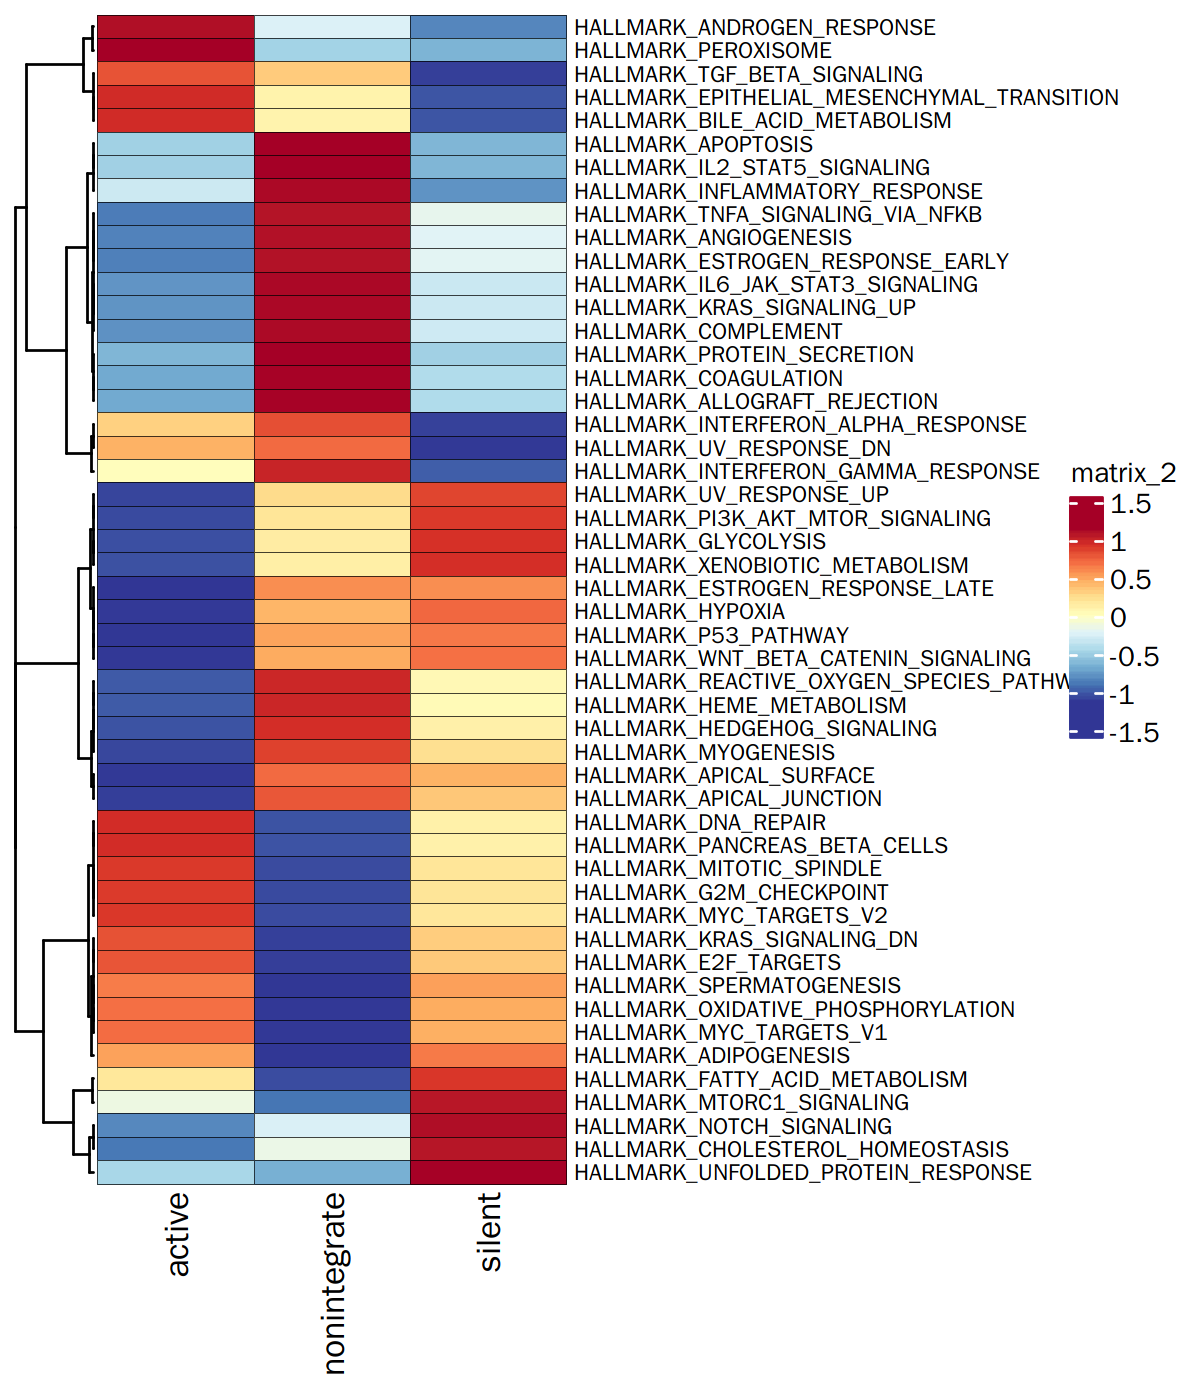

In [78]:
library(RColorBrewer)
#pdf("figures/sc_hallmarker_ssgsea_heatmap.pdf", width=6, height=7)
options(repr.plot.height =7, repr.plot.width = 6, repr.plot.res=200)
p = Heatmap(d, clustering_distance_rows = "pearson", rect_gp = gpar(col = "black", lwd=.25),, cluster_columns = F, row_names_gp = gpar(fontsize = 8), col=rev(brewer.pal(11,'RdYlBu')))
print(p)